<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [4]:
# finaldf = pd.read_csv('predictions.csv')

In [33]:
ticker = '^NSEBANK'
# ^NSEI, ^NSEBANK
df = yf.download(ticker, start = '2020-04-01')
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [34]:
df.reset_index(inplace = True)

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,19122.400391,19154.750000,18042.250000,18208.349609,18208.349609,274900
1,2020-04-03,18325.050781,18326.099609,17143.199219,17249.300781,17249.300781,342500
2,2020-04-07,18454.550781,19190.550781,17953.750000,19062.500000,19062.500000,435400
3,2020-04-08,18799.400391,20324.099609,18482.900391,18946.449219,18946.449219,508400
4,2020-04-09,19553.150391,19988.300781,19166.900391,19913.599609,19913.599609,390000


In [36]:
df.sort_values('Date', inplace = True)

In [37]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
578,2022-08-01,37594.148438,37939.601562,37407.199219,37903.199219,37903.199219,346400
579,2022-08-02,37767.699219,38179.851562,37632.300781,38024.000000,38024.000000,317300
580,2022-08-03,37954.550781,38068.601562,37692.949219,37989.250000,37989.250000,200300
581,2022-08-04,38111.050781,38231.851562,37249.500000,37755.550781,37755.550781,186300
582,2022-08-05,37868.250000,38150.449219,37779.898438,37920.601562,37920.601562,175900


In [38]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [39]:
split = int(round(len(df)*0.8,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [40]:
split

466

## Forecasting using Auto TS

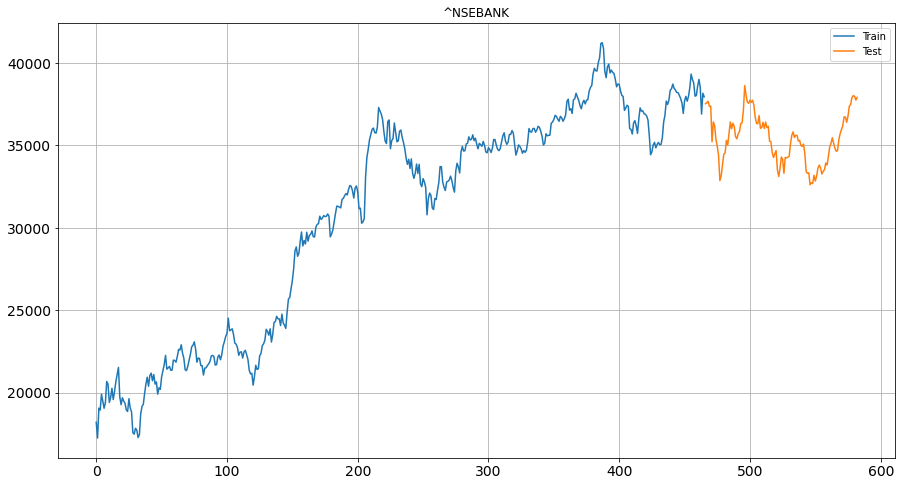

In [41]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [24]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from autots import AutoTS

In [43]:
model = AutoTS(forecast_length=5, frequency='infer',  ensemble='simple', drop_data_older_than_periods=200 )

In [44]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
7/7 [==============================] - 10s 6ms/step - loss: 0.3946
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3874
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3847
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3829
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.3774
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3754
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3690
Epoch 8/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3629
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3673
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3570
Epoch 11/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3466
Epoch 12/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3428
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
05:19:03 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 35 with model FBProphet in generation 0 of 10


05:19:03 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (5, 1), got (5,).') in model 42: UnobservedComponents
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (5, 1), got (5,).') in model 43: UnobservedComponents
Model Number: 44 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ap

05:19:07 - cmdstanpy - INFO - Chain [1] start processing
05:19:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 55 with model SeasonalNaive in generation 0 of 10
Model Number: 56 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 57 with model NVAR in generation 0 of 10
Model Number: 58 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 58: Theta
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 59: UnivariateRegression
Model Number: 60 with model ConstantNaive in generation 0 of 10
Model Number: 61 with model LastValueNaive in generation 0 of 10
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an un

05:19:10 - cmdstanpy - INFO - Chain [1] start processing
05:19:10 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 68 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 68: GluonTS
Model Number: 69 with model UnobservedComponents in generation 0 of 10
Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 72: WindowRegression
Model Number: 73 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 73: DatepartRegression
Model Number: 74 with model UnivariateRegression in generation 0 of 10
Model Nu

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 111 with model NVAR in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model FBProphet in generation 0 of 10


05:19:13 - cmdstanpy - INFO - Chain [1] start processing
05:19:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 114 with model ConstantNaive in generation 0 of 10
Model Number: 115 with model DatepartRegression in generation 0 of 10
Epoch 1/50
3/3 [==============================] - 6s 14ms/step - loss: 121.6471
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 103.8118
Epoch 3/50
3/3 [==============================] - 0s 13ms/step - loss: 100.3135
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 106.0209
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 100.8218
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 101.8651
Epoch 7/50
3/3 [==============================] - 0s 13ms/step - loss: 102.9012
Epoch 8/50
3/3 [==============================] - 0s 13ms/step - loss: 102.2464
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 101.5186
Epoch 10/50
3/3 [==============================] - 0s 21ms/step - loss: 102.1201
Epoch 11/50
3/3 [==============================] - 0s 12ms/step 

05:19:26 - cmdstanpy - INFO - Chain [1] start processing
05:19:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 116 with model FBProphet in generation 0 of 10
Model Number: 117 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 118 with model ConstantNaive in generation 0 of 10
Model Number: 119 with model UnivariateMotif in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 123: VAR
Model Number: 124 with model GLS in generation 0 of 10
Model Number: 125 with model WindowRegression in generation 0 of 10
Epoch 1/50
12/12 [==============================] - 6s 6ms/step - loss: nan
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: nan
Epoch 3/50
12/12 [==============================] - 0s 6ms/s

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 135 with model NVAR in generation 0 of 10
Model Number: 136 with model SectionalMotif in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 137 with model NVAR in generation 0 of 10
Model Number: 138 with model SeasonalNaive in generation 0 of 10
Model Number: 139 with model LastValueNaive in generation 0 of 10
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 143 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 143: ARDL
Model Number: 144 with model DatepartRegression in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') 

05:19:44 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 154 with model FBProphet in generation 0 of 10


05:19:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 155 with model GluonTS in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 155: GluonTS
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 156: VAR
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model GLS in generation 0 of 10
Model Number: 159 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 159: GLM
Model Number: 160 with model LastValueNaive in generation 0 of 10
Model Number: 161 with model MultivariateMotif in generation 0 of 10
Model Number: 162 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 162: VAR
Model Number: 163 with model LastValueNaive in generation 0 of 10
Model Number: 164 with model NVAR in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 165 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 165: GluonTS
Model Number: 166 with model MultivariateMotif in generation 0 of 10
Model Number: 167 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 167: ARDL
Model Number: 168 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 168: SectionalMotif
Model Number: 169 with model AverageValueNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 170 with model LastValueNaive in generation 1 of 10
Model Number: 171 with model GLS in generation 1 of 10
Model Number: 172 with model GLS in generation 1 of 10
Model Number: 173 with model LastValueNaive in generation 1 of 10
Model Number: 174 with model MultivariateReg

/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 175 with model GLS in generation 1 of 10
Model Number: 176 with model SectionalMotif in generation 1 of 10
Model Number: 177 with model DatepartRegression in generation 1 of 10
Model Number: 178 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 178: DatepartRegression
Model Number: 179 with model MultivariateMotif in generation 1 of 10
Model Number: 180 with model GLS in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 180: GLS
Model Number: 181 with model UnivariateRegression in generation 1 of 10
Model Number: 182 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 182: UnobservedComponents
Model Number: 183 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 200 with model LastValueNaive in generation 1 of 10
Model Number: 201 with model AverageValueNaive in generation 1 of 10
Model Number: 202 with model UnivariateRegression in generation 1 of 10
Model Number: 203 with model SeasonalNaive in generation 1 of 10
Model Number: 204 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 204: SectionalMotif
Model Number: 205 with model SectionalMotif in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 206 with model UnobservedComponents in generation 1 of 10
Model Number: 207 with model MultivariateRegression in generation 1 of 10
Model Number: 208 with model GLS in generation 1 of 10
Model Number: 209 with model LastValueNaive in generation 1 of 10
Model Number: 210 with model ConstantNaive in generation 1 of 10
Model Number: 211 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Model Number: 212 with model SeasonalNaive in generation 1 of 10


05:19:52 - cmdstanpy - INFO - Chain [1] start processing
05:19:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 213 with model FBProphet in generation 1 of 10
Model Number: 214 with model LastValueNaive in generation 1 of 10
Model Number: 215 with model SeasonalNaive in generation 1 of 10
Model Number: 216 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 216: UnivariateMotif
Model Number: 217 with model DatepartRegression in generation 1 of 10
Epoch 1/50
5/5 [==============================] - 5s 234ms/step - loss: nan - val_loss: nan
Epoch 2/50
5/5 [==============================] - 0s 101ms/step - loss: nan - val_loss: nan
Epoch 3/50
5/5 [==============================] - 1s 104ms/step - loss: nan - val_loss: nan
Epoch 4/50
5/5 [==============================] - 1s 105ms/step - loss: nan - val_loss: nan
Epoch 5/50
5/5 [==============================] - 1s 103ms/step - loss: nan - val_loss: nan
Epoch 6/50
5/5 [==============================] - 1s 102ms/step - loss: nan - val_loss: nan
Epoch 7/50
5/5 [========

05:20:06 - cmdstanpy - INFO - Chain [1] start processing


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 217: DatepartRegression
Model Number: 218 with model FBProphet in generation 1 of 10


05:20:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 219 with model UnobservedComponents in generation 1 of 10
Model Number: 220 with model DatepartRegression in generation 1 of 10
Model Number: 221 with model SeasonalNaive in generation 1 of 10
Model Number: 222 with model WindowRegression in generation 1 of 10
Model Number: 223 with model NVAR in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 224 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 224: ConstantNaive
Model Number: 225 with model GLS in generation 1 of 10
Model Number: 226 with model FBProphet in generation 1 of 10


05:20:09 - cmdstanpy - INFO - Chain [1] start processing
05:20:09 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 227 with model ConstantNaive in generation 1 of 10
Model Number: 228 with model NVAR in generation 1 of 10
Model Number: 229 with model AverageValueNaive in generation 1 of 10
Model Number: 230 with model SeasonalNaive in generation 1 of 10
Model Number: 231 with model FBProphet in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
05:20:11 - cmdstanpy - INFO - Chain [1] start processing
05:20:11 - cmdstanpy - INFO - Chain [1] done processing
05:20:13 - cmdstanpy - INFO - Chain [1] start processing
05:20:13 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 232 with model FBProphet in generation 1 of 10
Model Number: 233 with model SeasonalNaive in generation 1 of 10
Model Number: 234 with model SectionalMotif in generation 1 of 10
Model Number: 235 with model ConstantNaive in generation 1 of 10
Model Number: 236 with model UnivariateMotif in generation 1 of 10
Model Number: 237 with model ConstantNaive in generation 1 of 10
Model Number: 238 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 239 with model MultivariateMotif in generation 1 of 10

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)



Model Number: 240 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 241 with model UnivariateMotif in generation 1 of 10
Model Number: 242 with model MultivariateMotif in generation 1 of 10
Model Number: 243 with model FBProphet in generation 1 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 243: FBProphet
Model Number: 244 with model MultivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 244: MultivariateMotif
Model Number: 245 with model ConstantNaive in generation 1 of 10
Model Number: 246 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 246: NVAR
Model Number: 247 with model LastValueNaive in generation 1 of 10
Model Number: 248 with model ConstantNaive in generation 1 of 10
Model Number: 249 with model UnobservedComponents in generati

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 267 with model WindowRegression in generation 1 of 10
Model Number: 268 with model UnivariateRegression in generation 1 of 10
Model Number: 269 with model LastValueNaive in generation 1 of 10
Model Number: 270 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 271 with model UnobservedComponents in generation 1 of 10
Model Number: 272 with model SectionalMotif in generation 1 of 10
Model Number: 273 with model AverageValueNaive in generation 1 of 10
Model Number: 274 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 274: AverageValueNaive
Model Number: 275 with model LastValueNaive in generation 1 of 10
Model Number: 276 with model NVAR in generation 1 of 10
Model Number: 277 with model NVAR in generation 1 of 10
Model Number: 278 with model AverageValueNaive in generation 1 of 10
Model Number: 279 with model SectionalMotif in generation 1 of 10
New Generation: 2 of 10
Model Number: 280 with model LastValueNaive in generation 2 of 10


05:20:29 - cmdstanpy - INFO - Chain [1] start processing
05:20:29 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 281 with model FBProphet in generation 2 of 10
Model Number: 282 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 283 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 283: GLM
Model Number: 284 with model UnobservedComponents in generation 2 of 10
Model Number: 285 with model LastValueNaive in generation 2 of 10
Model Number: 286 with model ETS in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 286: ETS
Model Number: 287 with model NVAR in generation 2 of 10
Model Number: 288 with model ConstantNaive in generation 2 of 10
Model Number: 289 with model UnobservedComponents in genera

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:20:31 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 296 with model FBProphet in generation 2 of 10


05:20:31 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 297 with model SectionalMotif in generation 2 of 10
Model Number: 298 with model UnivariateMotif in generation 2 of 10
Model Number: 299 with model MultivariateMotif in generation 2 of 10
Model Number: 300 with model AverageValueNaive in generation 2 of 10
Model Number: 301 with model LastValueNaive in generation 2 of 10
Model Number: 302 with model GLS in generation 2 of 10
Model Number: 303 with model ConstantNaive in generation 2 of 10
Model Number: 304 with model ConstantNaive in generation 2 of 10
Model Number: 305 with model SectionalMotif in generation 2 of 10
Model Number: 306 with model NVAR in generation 2 of 10
Model Number: 307 with model UnobservedComponents in generation 2 of 10
Model Number: 308 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 309 with model LastValueNaive in generation 2 of 10
Model Number: 310 with model SeasonalNaive in generation 2 of 10
Model Number: 311 with model UnivariateRegression in generation 2 of 10
Model Number: 312 with model MultivariateRegression in generation 2 of 10
Model Number: 313 with model SectionalMotif in generation 2 of 10
Model Number: 314 with model SeasonalNaive in generation 2 of 10
Model Number: 315 with model AverageValueNaive in generation 2 of 10


05:20:34 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 316 with model FBProphet in generation 2 of 10


05:20:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 317 with model NVAR in generation 2 of 10
Model Number: 318 with model DatepartRegression in generation 2 of 10
Epoch 1/50
5/5 [==============================] - 5s 148ms/step - loss: 366519933376397312.0000 - val_loss: 301517596216262656.0000
Epoch 2/50
5/5 [==============================] - 0s 84ms/step - loss: 273323730078269440.0000 - val_loss: 213880695506862080.0000
Epoch 3/50
5/5 [==============================] - 1s 180ms/step - loss: 210325802615570432.0000 - val_loss: 139830305363066880.0000
Epoch 4/50
5/5 [==============================] - 0s 90ms/step - loss: 146041395008765952.0000 - val_loss: 85956615013924864.0000
Epoch 5/50
5/5 [==============================] - 0s 61ms/step - loss: 132304216990416896.0000 - val_loss: 35937174629122048.0000
Epoch 6/50
5/5 [==============================] - 0s 60ms/step - loss: 99741346910175232.0000 - val_loss: 18361064647294976.0000
Epoch 7/50
5/5 [==============================] - 0s 59ms/step - loss: 109375473951178752.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:532: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140
05:20:51 - cmdstanpy - INFO - Chain [1] start processing
05:20:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 321 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 321: MultivariateRegression
Model Number: 322 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 322: NVAR
Model Number: 323 with model FBProphet in generation 2 of 10
Model Number: 324 with model AverageValueNaive in generation 2 of 10
Model Number: 325 with model ConstantNaive in generation 2 of 10
Model Number: 326 with model MultivariateMotif in generation 2 of 10
Model Number: 327 with model UnivariateMotif in generation 2 of 10
Model Number: 328 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 329 with model NVAR in generation 2 of 10
Model Number: 330 with model ConstantNaive in generation 2 of 10
Model Number: 331 with model UnobservedComponents in generation 2 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 336 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 336: SeasonalNaive
Model Number: 337 with model SectionalMotif in generation 2 of 10
Model Number: 338 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 339 with model SectionalMotif in generation 2 of 10
Model Number: 340 with model SeasonalNaive in generation 2 of 10
Model Number: 341 with model GLS in generation 2 of 10
Model Number: 342 with model AverageValueNaive in generation 2 of 10
Model Number: 343 with model ConstantNaive in generation 2 of 10
Model Number: 344 with model LastValueNaive in generation 2 of 10
Model Number: 345 with model SeasonalNaive in generation 2 of 10
Model Number: 346 with model AverageValueNaive in generation 2 of 10
Model Number: 347 with model LastValueNaive in generation 2 of 10
Model Number: 348 with model LastValueNaive in gene

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:532: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


Model Number: 357 with model UnivariateRegression in generation 2 of 10
Model Number: 358 with model NVAR in generation 2 of 10
Model Number: 359 with model ConstantNaive in generation 2 of 10
Model Number: 360 with model UnivariateMotif in generation 2 of 10
Model Number: 361 with model UnivariateMotif in generation 2 of 10
Model Number: 362 with model MultivariateRegression in generation 2 of 10
Model Number: 363 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 364 with model ConstantNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 365 with model UnivariateRegression in generation 2 of 10
Model Number: 366 with model LastValueNaive in generation 2 of 10
Model Number: 367 with model ConstantNaive in generation 2 of 10
Model Number: 368 with model ConstantNaive in generation 2 of 10
Model Number: 369 with model LastValueNaive in generation 2 of 10
Model Number: 370 with model GLS in generation 2 of 10
Model Number: 371 with model DatepartRegression in generation 2 of 10
Epoch 1/50
3/3 [==============================] - 6s 15ms/step - loss: 53219172.0000
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 33411640.0000
Epoch 3/50
3/3 [==============================] - 0s 13ms/step - loss: 20510060.0000
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 19985322.0000
Epoch 5/50
3/3 [==============================] - 0s 13ms/step - loss: 15055390.0000
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 15794890.0000
Epoch 7/50
3/3 [===============

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
05:21:06 - cmdstanpy - INFO - Chain [1] start processing
05:21:06 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 373 with model FBProphet in generation 2 of 10
Model Number: 374 with model WindowRegression in generation 2 of 10
Model Number: 375 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 375: UnivariateMotif
Model Number: 376 with model AverageValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Model Number: 377 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 377: NVAR
Model Number: 378 with model UnivariateRegression in generation 2 of 10
Model Number: 379 with model SectionalMotif in generation 2 of 10
Model Number: 380 with model ConstantNaive in generation 2 of 10
Model Number: 381 with model MultivariateMotif in generation 2 of 10
Model Number: 382 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (15)') in model 382: SectionalMotif
Model Number: 383 with model WindowRegression in generation 2 of 10
Model Number: 384 with model ConstantNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 385 with model WindowRegression in generation 2 of 10
Model Number: 386 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 386: ETS
Model Number: 387 with model DatepartRegression in generation 2 of 10
Model Number: 388 with model NVAR in generation 2 of 10
Model Number: 389 with model WindowRegression in generation 2 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]New Generation: 3 of 10
Model Number: 390 with model LastValueNaive in generation 3 of 10
Model Number: 391 with model UnivariateMotif in generation 3 of 10
Model Number: 392 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 393 with model AverageValueNaive in generation 3 of 10
Model Number: 394 with model WindowRegression in generation 3 of 10
Model Number: 395 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 403 with model UnivariateMotif in generation 3 of 10
Model Number: 404 with model SectionalMotif in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning:

Model Number: 405 with model UnivariateRegression in generation 3 of 10
Model Number: 406 with model FBProphet in generation 3 of 10


05:21:12 - cmdstanpy - INFO - Chain [1] start processing
05:21:12 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 407 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 407: UnivariateRegression
Model Number: 408 with model UnobservedComponents in generation 3 of 10
Model Number: 409 with model MultivariateRegression in generation 3 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 409: MultivariateRegression
Model Number: 410 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 411 with model NVAR in generation 3 of 10
Model Number: 412 with model ConstantNaive in generation 3 of 10
Model Number: 413 with model UnivariateRegression in generation 3 of 10
Model Number: 414 with model WindowRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 415 with model SectionalMotif in generation 3 of 10
Model Number: 416 with model UnivariateMotif in generation 3 of 10
Model Number: 417 with model SeasonalNaive in generation 3 of 10
Model Number: 418 with model ConstantNaive in generation 3 of 10
Model Number: 419 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 419: GLS
Model Number: 420 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 421 with model LastValueNaive in generation 3 of 10
Model Number: 422 with model WindowRegression in generation 3 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 423 with model UnivariateMotif in generation 3 of 10
Model Number: 424 with model AverageValueNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 425 with model SectionalMotif in generation 3 of 10
Model Number: 426 with model SeasonalNaive in generation 3 of 10
Model Number: 427 with model LastValueNaive in generation 3 of 10
Model Number: 428 with model UnivariateRegression in generation 3 of 10
Model Number: 429 with model GLS in generation 3 of 10
Model Number: 430 with model SectionalMotif in generation 3 of 10
Model Number: 431 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 431: UnivariateRegression
Model Number: 432 with model NVAR in generation 3 of 10
Model Number: 433 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 433: UnivariateRegression
Model Number: 434 with model UnivariateMotif in generation 3 of 10
Model Number: 435 with model GLS in generation 3 of 10
Model Number: 436 with model Sea

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_div

Model Number: 438 with model AverageValueNaive in generation 3 of 10
Model Number: 439 with model ConstantNaive in generation 3 of 10
Model Number: 440 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 441 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 441: SeasonalNaive
Model Number: 442 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s fin

Model Number: 443 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 444 with model NVAR in generation 3 of 10
Model Number: 445 with model NVAR in generation 3 of 10
Model Number: 446 with model SectionalMotif in generation 3 of 10
Model Number: 447 with model LastValueNaive in generation 3 of 10
Model Number: 448 with model ConstantNaive in generation 3 of 10
Model Number: 449 with model WindowRegression in generation 3 of 10
Model Number: 450 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 450: FBProphet
Model Number: 451 with model FBProphet in generation 3 of 10


05:21:17 - cmdstanpy - INFO - Chain [1] start processing
05:21:17 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 452 with model ConstantNaive in generation 3 of 10
Model Number: 453 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 453: FBProphet
Model Number: 454 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 455 with model AverageValueNaive in generation 3 of 10
Model Number: 456 with model SeasonalNaive in generation 3 of 10
Model Number: 457 with model FBProphet in generation 3 of 10


05:21:20 - cmdstanpy - INFO - Chain [1] start processing
05:21:20 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 458 with model LastValueNaive in generation 3 of 10
Model Number: 459 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 459: WindowRegression
Model Number: 460 with model DatepartRegression in generation 3 of 10
Epoch 1/100
7/7 [==============================] - 6s 6ms/step - loss: 0.1154
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0871
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0571
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0260
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 9/100
7/7 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 470 with model LastValueNaive in generation 3 of 10
Model Number: 471 with model UnivariateMotif in generation 3 of 10
Model Number: 472 with model DatepartRegression in generation 3 of 10
Model Number: 473 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 473: UnobservedComponents
Model Number: 474 with model UnobservedComponents in generation 3 of 10
Model Number: 475 with model SectionalMotif in generation 3 of 10
Model Number: 476 with model ConstantNaive in generation 3 of 10
Model Number: 477 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 478 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 478: MultivariateRegression
Model Number: 479 with model ConstantNaive in generation

05:21:38 - cmdstanpy - INFO - Chain [1] start processing
05:21:38 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 491 with model WindowRegression in generation 3 of 10
Model Number: 492 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (83)') in model 492: MultivariateMotif
Model Number: 493 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 493: UnobservedComponents
Model Number: 494 with model DatepartRegression in generation 3 of 10
Model Number: 495 with model NVAR in generation 3 of 10
Model Number: 496 with model GLS in generation 3 of 10
Model Number: 497 with model ConstantNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 498 with model MultivariateRegression in generation 3 of 10
Model Number: 499 with model MultivariateMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 500 with model UnivariateMotif in generation 4 of 10
Model Number: 501 with model MultivariateMotif in generation 4 of 10
Model Number: 502 with model UnivariateMotif in generation 4 of 10
Model Number: 503 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 504 with model NVAR in generation 4 of 10
Model Number: 505 with model UnivariateRegression in generation 4 of 10
Model Number: 506 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-p

Model Number: 507 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 508 with model MultivariateMotif in generation 4 of 10
Model Number: 509 with model AverageValueNaive in generation 4 of 10
Model Number: 510 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 511 with model ConstantNaive in generation 4 of 10
Model Number: 512 with model ConstantNaive in generation 4 of 10
Model Number: 513 with model MultivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 513: MultivariateRegression
Model Number: 514 with model MultivariateMotif in generation 4 of 10
Model Number: 515 with model SeasonalNaive in generation 4 of 10
Model Number: 516 with model SectionalMotif in generation 4 of 10
Model Number: 517 with model UnivariateMotif in generation 4 of 10
Model Number: 518 with model ConstantNaive in generation 4 of 10
Model Number: 519 with model SectionalMotif in generation 4 of 10
Model Number: 520 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 521 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 521: DatepartRegression
Model Number: 522 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 522: FBProphet
Model Number: 523 with model SeasonalNaive in generation 4 of 10
Model Number: 524 with model ConstantNaive in generation 4 of 10
Model Number: 525 with model SectionalMotif in generation 4 of 10
Model Number: 526 with model SectionalMotif in generation 4 of 10
Model Number: 527 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning

Model Number: 528 with model FBProphet in generation 4 of 10


05:21:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 529 with model GLS in generation 4 of 10
Model Number: 530 with model AverageValueNaive in generation 4 of 10
Model Number: 531 with model ConstantNaive in generation 4 of 10
Model Number: 532 with model AverageValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 533 with model WindowRegression in generation 4 of 10
Model Number: 534 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


05:21:46 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 535 with model FBProphet in generation 4 of 10


05:21:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 536 with model ConstantNaive in generation 4 of 10
Model Number: 537 with model DatepartRegression in generation 4 of 10
Model Number: 538 with model LastValueNaive in generation 4 of 10
Model Number: 539 with model LastValueNaive in generation 4 of 10
Model Number: 540 with model LastValueNaive in generation 4 of 10
Model Number: 541 with model SectionalMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e-03, tolerance: 2.144e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 542 with model ConstantNaive in generation 4 of 10
Model Number: 543 with model ConstantNaive in generation 4 of 10
Model Number: 544 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 545 with model UnivariateMotif in generation 4 of 10
Model Number: 546 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 546: ConstantNaive
Model Number: 547 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 547: SeasonalNaive
Model Number: 548 with model SeasonalNaive in generation 4 of 10
Model Number: 549 with model LastValueNaive in generation 4 of 10
Model Number: 550 with model AverageValueNaive in generation 4 of 10
Model Number: 551 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 551: MultivariateMotif
Model Number: 552 with model AverageValueNaive in generation 4 of 10
Model Number: 553 with model AverageValueNaive in generation 4 of 10
Model Number: 554 with model NVAR in generation 4 of 10
Model Number: 555 with model UnivariateRegre

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 559 with model LastValueNaive in generation 4 of 10
Model Number: 560 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (5, 1), got (5,).') in model 560: UnobservedComponents
Model Number: 561 with model AverageValueNaive in generation 4 of 10
Model Number: 562 with model UnivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 563 with model NVAR in generation 4 of 10
Model Number: 564 with model NVAR in generation 4 of 10
Model Number: 565 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 566 with model SectionalMotif in generation 4 of 10
Model Number: 567 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 567: UnivariateMotif
Model Number: 568 with model ConstantNaive in generation 4 of 10
Model Number: 569 with model ConstantNaive in generation 4 of 10
Model Number: 570 with model GLS in generation 4 of 10
Model Number: 571 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 571: GLS
Model Number: 572 with model UnivariateMotif in generation 4 of 10
Model Number: 573 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 574 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 574: FBProphet
Model Number: 575 with model SectionalMotif in generation 4 of 10
Model Number: 576 with model NVAR in generation 4 of 10
Model Number: 577 with model NVAR in generation 4 of 10
Model Number: 578 with model UnivariateRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 578: UnivariateRegression
Model Number: 579 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 580 with model UnivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 580: UnivariateRegression
Model Number: 581 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 582 with model UnobservedComponents in generation 4 of 10
Model Number: 583 with model SectionalMotif in generation 4 of 10
Model Number: 584 with model GLS in generation 4 of 10
Model Number: 585 with model AverageValueNaive in generation 4 of 10
Model Number: 586 with model MultivariateMotif in generation 4 of 10
Model Number: 587 with model UnivariateMotif in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 588 with model LastValueNaive in generation 4 of 10
Model Number: 589 with model WindowRegression in generation 4 of 10
Model Number: 590 with model SectionalMotif in generation 4 of 10
Model Number: 591 with model UnivariateRegression in generation 4 of 10
Model Number: 592 with model LastValueNaive in generation 4 of 10
Model Number: 593 with model NVAR in generation 4 of 10
Model Number: 594 with model SeasonalNaive in generation 4 of 10
Model Number: 595 with model UnivariateMotif in generation 4 of 10
Model Number: 596 with model GLS in generation 4 of 10
Model Number: 597 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


05:21:55 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 598 with model FBProphet in generation 4 of 10


05:21:55 - cmdstanpy - INFO - Chain [1] done processing
05:21:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
05:21:55 - cmdstanpy - INFO - Chain [1] start processing
05:21:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 599 with model NVAR in generation 4 of 10
Model Number: 600 with model LastValueNaive in generation 4 of 10
Model Number: 601 with model ConstantNaive in generation 4 of 10
Model Number: 602 with model NVAR in generation 4 of 10
Model Number: 603 with model UnivariateRegression in generation 4 of 10
Model Number: 604 with model UnobservedComponents in generation 4 of 10
Model Number: 605 with model UnivariateRegression in generation 4 of 10
Model Number: 606 with model WindowRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 607 with model SeasonalNaive in generation 4 of 10
Model Number: 608 with model NVAR in generation 4 of 10
Model Number: 609 with model WindowRegression in generation 4 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


New Generation: 5 of 10
Model Number: 610 with model GLM in generation 5 of 10
Model Number: 611 with model SectionalMotif in generation 5 of 10
Model Number: 612 with model NVAR in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 613 with model UnivariateRegression in generation 5 of 10
Model Number: 614 with model MultivariateMotif in generation 5 of 10
Model Number: 615 with model LastValueNaive in generation 5 of 10
Model Number: 616 with model UnivariateMotif in generation 5 of 10
Model Number: 617 with model SectionalMotif in generation 5 of 10
Model Number: 618 with model LastValueNaive in generation 5 of 10
Model Number: 619 with model NVAR in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 620 with model AverageValueNaive in generation 5 of 10
Model Number: 621 with model LastValueNaive in generation 5 of 10
Model Number: 622 with model AverageValueNaive in generation 5 of 10
Model Number: 623 with model GLS in generation 5 of 10
Model Number: 624 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 624: WindowRegression
Model Number: 625 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 626 with model SectionalMotif in generation 5 of 10
Model Number: 627 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 628 with model ConstantNaive in generation 5 of 10
Model Number: 629 with model Constan

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 630 with model SeasonalNaive in generation 5 of 10
Model Number: 631 with model SectionalMotif in generation 5 of 10
Model Number: 632 with model WindowRegression in generation 5 of 10
Model Number: 633 with model NVAR in generation 5 of 10
Model Number: 634 with model LastValueNaive in generation 5 of 10
Model Number: 635 with model GLS in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Model Number: 636 with model WindowRegression in generation 5 of 10
Model Number: 637 with model NVAR in generation 5 of 10
Model Number: 638 with model UnivariateMotif in generation 5 of 10
Model Number: 639 with model FBProphet in generation 5 of 10
Model Number: 640 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 640: UnobservedComponents
Model Number: 641 with model MultivariateMotif in generation 5 of 10
Model Number: 642 with model ConstantNaive in generation 5 of 10
Model Number: 643 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 643: UnivariateRegression
Model Number: 644 with model AverageValueNaive in generation 5 of 10
Model Number: 645 with model LastValueNaive in generation 5 of 10
Model Number: 646 with model LastValueNaive in generation 5 of 10
Model Number: 647 with model Avera

05:22:03 - cmdstanpy - INFO - Chain [1] start processing
05:22:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 655 with model SectionalMotif in generation 5 of 10
Model Number: 656 with model NVAR in generation 5 of 10
Model Number: 657 with model GLS in generation 5 of 10
Model Number: 658 with model AverageValueNaive in generation 5 of 10
Model Number: 659 with model WindowRegression in generation 5 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 660 with model LastValueNaive in generation 5 of 10
Model Number: 661 with model SeasonalNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 662 with model SectionalMotif in generation 5 of 10
Model Number: 663 with model GLS in generation 5 of 10
Model Number: 664 with model ConstantNaive in generation 5 of 10
Model Number: 665 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 666 with model SectionalMotif in generation 5 of 10
Model Number: 667 with model UnivariateMotif in generation 5 of 10
Model Number: 668 with model UnivariateRegression in generation 5 of 10
Model Number: 669 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 669: WindowRegression
Model Number: 670 with model SectionalMotif in generation 5 of 10
Model Number: 671 with model AverageValueNaive in generation 5 of 10
Model Number: 672 with model AverageValueNaive in generation 5 of 10
Model Number: 673 with model ETS in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:22:07 - cmdstanpy - INFO - Chain [1] start processing
05:22:07 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 682 with model NVAR in generation 5 of 10
Model Number: 683 with model LastValueNaive in generation 5 of 10
Model Number: 684 with model UnivariateRegression in generation 5 of 10
Model Number: 685 with model SeasonalNaive in generation 5 of 10
Model Number: 686 with model ConstantNaive in generation 5 of 10
Model Number: 687 with model MultivariateMotif in generation 5 of 10
Model Number: 688 with model WindowRegression in generation 5 of 10
Model Number: 689 with model NVAR in generation 5 of 10
Model Number: 690 with model SeasonalNaive in generation 5 of 10
Model Number: 691 with model UnivariateRegression in generation 5 of 10
Model Number: 692 with model UnivariateMotif in generation 5 of 10
Model Number: 693 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 693: UnivariateRegression
Model Number: 694 with model NVAR in generation 5 of 10
Model Number: 695 with model UnivariateReg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+08, tolerance: 6.314e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 698 with model NVAR in generation 6 of 10
Model Number: 699 with model SeasonalNaive in generation 6 of 10
Model Number: 700 with model ETS in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 700: ETS
Model Number: 701 with model UnivariateMotif in generation 6 of 10
Model Number: 702 with model UnivariateRegression in generation 6 of 10
Model Number: 703 with model LastValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 704 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 705 with model UnivariateMotif in generation 6 of 10
Model Number: 706 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 706: MultivariateRegression
Model Number: 707 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 708 with model UnivariateMotif in generation 6 of 10
Model Number: 709 with model UnivariateMotif in generation 6 of 10
Model Number: 710 with model AverageValueNaive in generation 6 of 10
Model Number: 711 with model UnivariateMotif in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 712 with model AverageValueNaive in generation 6 of 10
Model Number: 713 with model UnivariateMotif in generation 6 of 10
Model Number: 714 with model SeasonalNaive in generation 6 of 10
Model Number: 715 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 716 with model SectionalMotif in generation 6 of 10
Model Number: 717 with model SeasonalNaive in generation 6 of 10
Model Number: 718 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 719 with model UnivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 720 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 720: WindowRegression
Model Number: 721 with model LastValueNaive in generation 6 of 10
Model Number: 722 with model GLS in generation 6 of 10
Model Number: 723 with model ConstantNaive in generation 6 of 10
Model Number: 724 with model UnivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 725 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 725: MultivariateRegression
Model Number: 726 with model UnivariateMotif in generation 6 of 10
Model Number: 727 with model SectionalMotif in generation 6 of 10
Model Number: 728 with model AverageValueNaive in generation 6 of 10
Model Number: 729 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 730 with model MultivariateMotif in generation 6 of 10
Model Number: 731 with model NVAR in generation 6 of 10
Model Number: 732 with model UnivariateMotif in generation 6 of 10
Model Number: 733 with model AverageValueNaive in generation 6 of 10
Model Number: 734 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 735 with model LastValueNaive in generati

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 739 with model ConstantNaive in generation 6 of 10
Model Number: 740 with model SectionalMotif in generation 6 of 10
Model Number: 741 with model UnivariateMotif in generation 6 of 10
Model Number: 742 with model GLS in generation 6 of 10
Model Number: 743 with model LastValueNaive in generation 6 of 10
Model Number: 744 with model NVAR in generation 6 of 10
Model Number: 745 with model GLS in generation 6 of 10
Model Number: 746 with model WindowRegression in generation 6 of 10
Model Number: 747 with model LastValueNaive in generation 6 of 10
Model Number: 748 with model NVAR in generation 6 of 10
Model Number: 749 with model AverageValueNaive in generation 6 of 10
Model Number: 750 with model UnobservedComponents in generation 6 of 10
Model Number: 751 with model UnivariateRegression in generation 6 of 10
Model Number: 752 with model UnivariateRegression in generation 6 of 10
Model Number: 753 with model SectionalMotif in generation 6 of 10
Model Number: 754 with model 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 759 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on 0 with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 760 with model UnivariateRegression in generation 6 of 10
Model Number: 761 with model AverageValueNaive in generation 6 of 10
Model Number: 762 with model SectionalMotif in generation 6 of 10
Model Number: 763 with model UnobservedComponents in generation 6 of 10
Model Number: 764 with model ConstantNaive in generation 6 of 10
Model Number: 765 with model ConstantNaive in generation 6 of 10
Model Number: 766 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:23:01 - cmdstanpy - INFO - Chain [1] start processing
05:23:02 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 767 with model SeasonalNaive in generation 6 of 10
Model Number: 768 with model SeasonalNaive in generation 6 of 10
Model Number: 769 with model LastValueNaive in generation 6 of 10
Model Number: 770 with model SectionalMotif in generation 6 of 10
Model Number: 771 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 771: LastValueNaive
Model Number: 772 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 772: GLM
Model Number: 773 with model FBProphet in generation 6 of 10


05:23:03 - cmdstanpy - INFO - Chain [1] start processing
05:23:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 774 with model UnivariateRegression in generation 6 of 10
Model Number: 775 with model LastValueNaive in generation 6 of 10
Model Number: 776 with model UnobservedComponents in generation 6 of 10
Model Number: 777 with model MultivariateMotif in generation 6 of 10
Model Number: 778 with model FBProphet in generation 6 of 10


05:23:06 - cmdstanpy - INFO - Chain [1] start processing
05:23:06 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 779 with model AverageValueNaive in generation 6 of 10
Model Number: 780 with model NVAR in generation 6 of 10
Model Number: 781 with model SectionalMotif in generation 6 of 10
Model Number: 782 with model DatepartRegression in generation 6 of 10
Epoch 1/50
3/3 [==============================] - 6s 16ms/step - loss: 417.1075
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 251.8081
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 205.7735
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 195.9001
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 191.2685
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 244.7058
Epoch 7/50
3/3 [==============================] - 0s 13ms/step - loss: 239.1913
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 188.9794
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 225.3706
Epoch 10/50
3/3 [==

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 798 with model NVAR in generation 7 of 10
Model Number: 799 with model DatepartRegression in generation 7 of 10
Epoch 1/100
7/7 [==============================] - 6s 7ms/step - loss: 3.0582e-05
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 2.1482e-05
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3453e-05
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.1930e-05
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 7.8655e-06
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 5.5219e-06
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 5.1761e-06
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 3.1469e-06
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 3.3707e-06
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 3.0244e-06
Epoch 11/100
7/7 [==============================] - 0

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 803 with model MultivariateMotif in generation 7 of 10
Model Number: 804 with model SeasonalNaive in generation 7 of 10
Model Number: 805 with model LastValueNaive in generation 7 of 10
Model Number: 806 with model WindowRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 807 with model MultivariateMotif in generation 7 of 10
Model Number: 808 with model NVAR in generation 7 of 10
Model Number: 809 with model NVAR in generation 7 of 10


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 810 with model UnobservedComponents in generation 7 of 10
Model Number: 811 with model WindowRegression in generation 7 of 10
Model Number: 812 with model WindowRegression in generation 7 of 10
Model Number: 813 with model SectionalMotif in generation 7 of 10
Model Number: 814 with model UnivariateMotif in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

Model Number: 815 with model ConstantNaive in generation 7 of 10
Model Number: 816 with model WindowRegression in generation 7 of 10
Model Number: 817 with model LastValueNaive in generation 7 of 10
Model Number: 818 with model LastValueNaive in generation 7 of 10
Model Number: 819 with model WindowRegression in generation 7 of 10
Model Number: 820 with model UnivariateMotif in generation 7 of 10
Model Number: 821 with model SectionalMotif in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 822 with model WindowRegression in generation 7 of 10
Model Number: 823 with model FBProphet in generation 7 of 10


05:23:36 - cmdstanpy - INFO - Chain [1] start processing
05:23:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 824 with model UnivariateMotif in generation 7 of 10
Model Number: 825 with model AverageValueNaive in generation 7 of 10
Model Number: 826 with model WindowRegression in generation 7 of 10
[LibLinear]Model Number: 827 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 827: SectionalMotif
Model Number: 828 with model DatepartRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 829 with model UnivariateMotif in generation 7 of 10
Model Number: 830 with model SectionalMotif in generation 7 of 10
Model Number: 831 with model UnivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 832 with model LastValueNaive in generation 7 of 10
Model Number: 833 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 833: SectionalMotif
Model Number: 834 with model LastValueNaive in generation 7 of 10
Model Number: 835 with model NVAR in generation 7 of 10
Model Number: 836 with model AverageValueNaive in generation 7 of 10
Model Number: 837 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 837: UnivariateMotif
Model Number: 838 with model FBProphet in generation 7 of 10


05:23:39 - cmdstanpy - INFO - Chain [1] start processing
05:23:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 839 with model SectionalMotif in generation 7 of 10
Model Number: 840 with model UnivariateMotif in generation 7 of 10
Model Number: 841 with model FBProphet in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 841: FBProphet
Model Number: 842 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 843 with model UnobservedComponents in generation 7 of 10
Model Number: 844 with model LastValueNaive in generation 7 of 10
Model Number: 845 with model MultivariateMotif in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 846 with model WindowRegression in generation 7 of 10
Model Number: 847 with model UnivariateMotif in generation 7 of 10
Model Number: 848 with model SeasonalNaive in generation 7 of 10
Model Number: 849 with model AverageValueNaive in generation 7 of 10
Model Number: 850 with model ConstantNaive in generation 7 of 10
Model Number: 851 with model SectionalMotif in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 852 with model NVAR in generation 7 of 10
Model Number: 853 with model MultivariateMotif in generation 7 of 10
Model Number: 854 with model NVAR in generation 7 of 10
Model Number: 855 with model UnobservedComponents in generation 7 of 10
Model Number: 856 with model WindowRegression in generation 7 of 10
Model Number: 857 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 857: MultivariateRegression
Model Number: 858 with model UnivariateMotif in generation 7 of 10
Model Number: 859 with model SectionalMotif in generation 7 of 10
Model Number: 860 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 861 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 861: UnivariateMotif
Model Number: 862 with model UnivariateRegression in generation 7 of 10
Model Number: 863 with model FBProphet in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 863: FBProphet
Model Number: 864 with model UnivariateRegression in generation 7 of 10
Model Number: 865 with model AverageValueNaive in generation 7 of 10
Model Number: 866 with model AverageValueNaive in generation 7 of 10
Model Number: 867 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 867: NVAR
Model Number: 868 with model WindowRegression in generation 7 of 10
Model Number: 869 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 870 with model SeasonalNaiv

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 872 with model NVAR in generation 7 of 10
Model Number: 873 with model DatepartRegression in generation 7 of 10
Epoch 1/200
7/7 [==============================] - 6s 27ms/step - loss: 0.1674
Epoch 2/200
7/7 [==============================] - 0s 30ms/step - loss: 0.1740
Epoch 3/200
7/7 [==============================] - 0s 29ms/step - loss: 0.1627
Epoch 4/200
7/7 [==============================] - 0s 29ms/step - loss: 0.1639
Epoch 5/200
7/7 [==============================] - 0s 27ms/step - loss: 0.1653
Epoch 6/200
7/7 [==============================] - 0s 27ms/step - loss: 0.1643
Epoch 7/200
7/7 [==============================] - 0s 27ms/step - loss: 0.1702
Epoch 8/200
7/7 [==============================] - 0s 30ms/step - loss: 0.1662
Epoch 9/200
7/7 [==============================] - 0s 30ms/step - loss: 0.1630
Epoch 10/200
7/7 [==============================] - 0s 28ms/step - loss: 0.1640
Epoch 11/200
7/7 [==============================] - 0s 28ms/step - loss: 0.1635
Epo

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 879 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 879: SectionalMotif
Model Number: 880 with model AverageValueNaive in generation 8 of 10
Model Number: 881 with model LastValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 882 with model WindowRegression in generation 8 of 10
[LibLinear]Model Number: 883 with model UnivariateMotif in generation 8 of 10
Model Number: 884 with model SeasonalNaive in generation 8 of 10
Model Number: 885 with model UnivariateMotif in generation 8 of 10
Model Number: 886 with model ConstantNaive in generation 8 of 10
Model Number: 887 with model SectionalMotif in generation 8 of 10
Model Number: 888 with model LastValueNaive in generation 8 of 10
Model Number: 889 with model UnivariateRegression in generation 8 of 10
Model Number: 890 with model UnivariateMotif in generation 8 of 10
Model Number: 891 with model SeasonalNaive in generation 8 of 10
Model Number: 892 with model UnivariateRegression in generation 8 of 10
Model Number: 893 with model DatepartRegression in generation 8 of 10
Model Number: 894 with model UnivariateMotif in generation 8 of 10
Model Number: 895 with model WindowRegression in generation 8 of 10
Model Number: 896 with model AverageValueNai

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 904 with model UnivariateRegression in generation 8 of 10
Model Number: 905 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 906 with model NVAR in generation 8 of 10
Model Number: 907 with model FBProphet in generation 8 of 10


05:25:16 - cmdstanpy - INFO - Chain [1] start processing
05:25:16 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 908 with model AverageValueNaive in generation 8 of 10
Model Number: 909 with model UnivariateMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 910 with model FBProphet in generation 8 of 10


05:25:18 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 911 with model SeasonalNaive in generation 8 of 10
Model Number: 912 with model NVAR in generation 8 of 10
Model Number: 913 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 913: AverageValueNaive
Model Number: 914 with model AverageValueNaive in generation 8 of 10
Model Number: 915 with model NVAR in generation 8 of 10
Model Number: 916 with model UnivariateRegression in generation 8 of 10
Model Number: 917 with model AverageValueNaive in generation 8 of 10
Model Number: 918 with model WindowRegression in generation 8 of 10
Epoch 1/100
5/5 [==============================] - 4s 162ms/step - loss: 204.9993 - val_loss: 96.9974
Epoch 2/100
5/5 [==============================] - 0s 84ms/step - loss: 123.3827 - val_loss: 94.4477
Epoch 3/100
5/5 [==============================] - 0s 90ms/step - loss: 170.4732 - val_loss: 95.5719
Epoch 4/100
5/5 [==============================] - 0s 87ms/step - loss

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 925 with model MultivariateRegression in generation 8 of 10
Model Number: 926 with model UnivariateRegression in generation 8 of 10
Model Number: 927 with model LastValueNaive in generation 8 of 10
Model Number: 928 with model UnobservedComponents in generation 8 of 10


05:25:37 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 929 with model FBProphet in generation 8 of 10


05:25:37 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 930 with model GLS in generation 8 of 10
Model Number: 931 with model FBProphet in generation 8 of 10
Model Number: 932 with model NVAR in generation 8 of 10
Model Number: 933 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 933: UnobservedComponents
Model Number: 934 with model SectionalMotif in generation 8 of 10


05:25:41 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 935 with model FBProphet in generation 8 of 10


05:25:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 936 with model UnivariateRegression in generation 8 of 10
Model Number: 937 with model LastValueNaive in generation 8 of 10
Model Number: 938 with model SectionalMotif in generation 8 of 10
Model Number: 939 with model SectionalMotif in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_lo

Model Number: 940 with model SectionalMotif in generation 8 of 10
Model Number: 941 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 942 with model SeasonalNaive in generation 8 of 10
Model Number: 943 with model FBProphet in generation 8 of 10


05:25:44 - cmdstanpy - INFO - Chain [1] start processing
05:25:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 944 with model MultivariateRegression in generation 8 of 10
Model Number: 945 with model AverageValueNaive in generation 8 of 10
Model Number: 946 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 947 with model ConstantNaive in generation 8 of 10
Model Number: 948 with model NVAR in generation 8 of 10
Model Number: 949 with model NVAR in generation 8 of 10
Model Number: 950 with model MultivariateMotif in generation 8 of 10
Model Number: 951 with model UnivariateRegression in generation 8 of 10
Model Number: 952 with model GLS in generation 8 of 10
Model Number: 953 with model UnivariateRegression in generation 8 of 10
Model Number: 954 with model MultivariateMotif in generation 8 of 10
Model Number: 955 with model MultivariateMotif in generation 8 of 10
Model Number: 956 with model AverageValueNaive in generation 8 of 10
Model Number: 957 with model SectionalMotif in generation 8 of 10
Model Number: 958 with model ConstantNaive in generation 8 of 10
Model Number: 959 with model UnivariateMotif in generation 8 of 10
Model Number: 960 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Numbe

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 970 with model FBProphet in generation 9 of 10
Model Number: 971 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 971: MultivariateMotif
Model Number: 972 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 972: UnobservedComponents
Model Number: 973 with model UnivariateMotif in generation 9 of 10
Model Number: 974 with model WindowRegression in generation 9 of 10
[LibLinear]Model Number: 975 with model LastValueNaive in generation 9 of 10
Model Number: 976 with model LastValueNaive in generation 9 of 10
Model Number: 977 with model ConstantNaive in generation 9 of 10
Model Number: 978 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:25:49 - cmdstanpy - INFO - Chain [1] start processing
05:25:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 979 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 980 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 981 with model UnivariateMotif in generation 9 of 10
Model Number: 982 with model UnivariateRegression in generation 9 of 10
Model Number: 983 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 984 with model SeasonalNaive in generation 9 of 10
Model Number: 985 with model FBProphet in generation 9 of 10
Model Number: 986 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 986: AverageValueNaive
Model Number: 987 with model ConstantNaive in generation 9 of 10
Model Number: 988 with model ConstantNaive in generation 9 of 10
Model Number: 989 with model SectionalMotif in generation 9 of 10
Model Number: 990 with model LastValueNaive in generation 9 of 10
Model Number: 991 with model LastValueNaive in generation 9 of 10
Model Number: 992 with model AverageValueNaive in generation 9 of 10
Model Number: 993 with model ConstantNaive in generation 9 of 10
Model Number: 994 with model LastValueNaive in generation 9 of 10
Model Number: 995 with model NVAR in generation 9 of 10
Model Number: 996 with model FBProphet in generation 9 of 10
Model Number: 997 with model LastValueNaive in generation 9 of 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1011 with model GLS in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
05:25:58 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1012 with model FBProphet in generation 9 of 10


05:25:58 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1013 with model ConstantNaive in generation 9 of 10
Model Number: 1014 with model SectionalMotif in generation 9 of 10
Model Number: 1015 with model LastValueNaive in generation 9 of 10
Model Number: 1016 with model SeasonalNaive in generation 9 of 10
Model Number: 1017 with model NVAR in generation 9 of 10
Model Number: 1018 with model WindowRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1018: WindowRegression


05:26:00 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1019 with model FBProphet in generation 9 of 10


05:26:00 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1020 with model NVAR in generation 9 of 10
Model Number: 1021 with model UnivariateMotif in generation 9 of 10
Model Number: 1022 with model UnivariateMotif in generation 9 of 10
Model Number: 1023 with model SeasonalNaive in generation 9 of 10
Model Number: 1024 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
05:26:01 - cmdstanpy - INFO - Chain [1] start processing
05:26:01 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1025 with model NVAR in generation 9 of 10
Model Number: 1026 with model WindowRegression in generation 9 of 10
Model Number: 1027 with model ConstantNaive in generation 9 of 10
Model Number: 1028 with model WindowRegression in generation 9 of 10
Model Number: 1029 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide

Model Number: 1030 with model ConstantNaive in generation 9 of 10
Model Number: 1031 with model WindowRegression in generation 9 of 10
Model Number: 1032 with model UnivariateRegression in generation 9 of 10
Model Number: 1033 with model UnobservedComponents in generation 9 of 10
Model Number: 1034 with model ETS in generation 9 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 1034: ETS
Model Number: 1035 with model LastValueNaive in generation 9 of 10
Model Number: 1036 with model LastValueNaive in generation 9 of 10
Model Number: 1037 with model UnivariateMotif in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1038 with model AverageValueNaive in generation 9 of 10
Model Number: 1039 with model SectionalMotif in generation 9 of 10
Model Number: 1040 with model GLS in generation 9 of 10
Model Number: 1041 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1041: GLM
Model Number: 1042 with model UnivariateRegression in generation 9 of 10
Model Number: 1043 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1043: WindowRegression
Model Number: 1044 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1045 with model UnivariateMotif in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1046 with model MultivariateMotif in generation 9 of 10
Model Number: 1047 with model LastValueNaive in generation 9 of 10
Model Number: 1048 with model UnivariateMotif in generation 9 of 10
Model Number: 1049 with model SectionalMotif in generation 9 of 10
New Generation: 10 of 10
Model Number: 1050 with model LastValueNaive in generation 10 of 10
Model Number: 1051 with model AverageValueNaive in generation 10 of 10
Model Number: 1052 with model NVAR in generation 10 of 10
Model Number: 1053 with model SectionalMotif in generation 10 of 10
Model Number: 1054 with model GLS in generation 10 of 10
Model Number: 1055 with model UnivariateMotif in generation 10 of 10
Model Number: 1056 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1056: SectionalMotif
Model Number: 1057 with model UnivariateMotif in generation 10 of 10
Model Number: 1058 with model ConstantNaive in generation 10 of 10
Model Numb

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1066 with model UnivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1066: UnivariateMotif
Model Number: 1067 with model AverageValueNaive in generation 10 of 10
Model Number: 1068 with model FBProphet in generation 10 of 10
Model Number: 1069 with model GLS in generation 10 of 10
Model Number: 1070 with model WindowRegression in generation 10 of 10
Model Number: 1071 with model SeasonalNaive in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1072 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1072: FBProphet
Model Number: 1073 with model FBProphet in generation 10 of 10


05:26:08 - cmdstanpy - INFO - Chain [1] start processing
05:26:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1074 with model SectionalMotif in generation 10 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 1074: SectionalMotif
Model Number: 1075 with model ConstantNaive in generation 10 of 10
Model Number: 1076 with model ConstantNaive in generation 10 of 10
Model Number: 1077 with model LastValueNaive in generation 10 of 10
Model Number: 1078 with model ConstantNaive in generation 10 of 10
Model Number: 1079 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1079: SectionalMotif
Model Number: 1080 with model UnivariateMotif in generation 10 of 10
Model Number: 1081 with model SectionalMotif in generation 10 of 10
Model Number: 1082 with model SeasonalNaive in generation 10 of 10
Model Number: 1083 with model AverageValueNaive in generation 10 of 10
Model Number: 1084 with model UnivariateRegression in generation 10 of 10
Model Number: 1085 with model MultivariateMotif in generatio

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 1102 with model NVAR in generation 10 of 10
Model Number: 1103 with model UnivariateRegression in generation 10 of 10
Model Number: 1104 with model UnivariateRegression in generation 10 of 10
Model Number: 1105 with model WindowRegression in generation 10 of 10
Model Number: 1106 with model SectionalMotif in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1107 with model ConstantNaive in generation 10 of 10
Model Number: 1108 with model GLS in generation 10 of 10
Model Number: 1109 with model AverageValueNaive in generation 10 of 10
Model Number: 1110 with model WindowRegression in generation 10 of 10
Model Number: 1111 with model NVAR in generation 10 of 10


05:26:12 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1112 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1112: SectionalMotif
Model Number: 1113 with model FBProphet in generation 10 of 10


05:26:13 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1114 with model SectionalMotif in generation 10 of 10
Model Number: 1115 with model SectionalMotif in generation 10 of 10
Model Number: 1116 with model Ensemble in generation 11 of Ensembles
Model Number: 1117 with model Ensemble in generation 11 of Ensembles
Model Number: 1118 with model Ensemble in generation 11 of Ensembles
Model Number: 1119 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1120 with model Ensemble in generation 11 of Ensembles
Model Number: 1121 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/too

Model Number: 1122 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1123 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Validation Round: 1
Model Number: 1 of 155 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 1 - Ensemble with avg smape 2.38: 
Model Number: 2 of 155 with model SectionalMotif for Validation 1
2 - SectionalMotif with avg smape 2.55: 
Model Number: 3 of 155 with model LastValueNaive for Validation 1
3 - LastValueNaive with avg smape 2.55: 
Model Number: 4 of 155 with model UnivariateMotif for Validation 1
4 - UnivariateMotif with avg smape 2.55: 
Model Number: 5 of 155 with model UnivariateMotif for Validation 1
5 - UnivariateMotif with avg smape 2.55: 
Model Number: 6 of 155 with model AverageValueNaive for Validation 1
6 - AverageValueNaive with avg smape 2.55: 
Model Number: 7 of 155 with model ConstantNaive for Validation 1
7 - ConstantNaive with avg smape 2.55: 
Model Number: 8 of 155 with model Ensemble for Validation 1
8 - Ensemble with avg smape 2.55: 
Model Number: 9 of 155 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


9 - UnivariateMotif with avg smape 2.55: 
Model Number: 10 of 155 with model UnivariateRegression for Validation 1
10 - UnivariateRegression with avg smape 2.55: 
Model Number: 11 of 155 with model SeasonalNaive for Validation 1
11 - SeasonalNaive with avg smape 2.55: 
Model Number: 12 of 155 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


12 - Ensemble with avg smape 2.55: 
Model Number: 13 of 155 with model Ensemble for Validation 1
13 - Ensemble with avg smape 2.55: 
Model Number: 14 of 155 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


14 - Ensemble with avg smape 2.55: 
Model Number: 15 of 155 with model SectionalMotif for Validation 1
15 - SectionalMotif with avg smape 2.55: 
Model Number: 16 of 155 with model AverageValueNaive for Validation 1
16 - AverageValueNaive with avg smape 2.55: 
Model Number: 17 of 155 with model UnivariateMotif for Validation 1
17 - UnivariateMotif with avg smape 2.86: 
Model Number: 18 of 155 with model UnivariateMotif for Validation 1
18 - UnivariateMotif with avg smape 2.54: 
Model Number: 19 of 155 with model LastValueNaive for Validation 1
19 - LastValueNaive with avg smape 2.65: 
Model Number: 20 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
20 - ETS with avg smape 2.65: 
Model Number: 21 of 155 with model SectionalMotif for Validation 1
21 - SectionalMotif with avg smape 2.65: 
Model Number: 22 of 155 with model LastValueNaive for Validation 1
22 - LastValueNaive with avg smape 2.65: 
Model Number: 23 of 

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


23 - LastValueNaive with avg smape 2.65: 
Model Number: 24 of 155 with model LastValueNaive for Validation 1
24 - LastValueNaive with avg smape 2.65: 
Model Number: 25 of 155 with model SectionalMotif for Validation 1
25 - SectionalMotif with avg smape 2.65: 
Model Number: 26 of 155 with model SectionalMotif for Validation 1
26 - SectionalMotif with avg smape 2.65: 
Model Number: 27 of 155 with model SectionalMotif for Validation 1
27 - SectionalMotif with avg smape 2.65: 
Model Number: 28 of 155 with model SectionalMotif for Validation 1
28 - SectionalMotif with avg smape 2.68: 
Model Number: 29 of 155 with model WindowRegression for Validation 1
[LibLinear]29 - WindowRegression with avg smape 2.68: 
Model Number: 30 of 155 with model SectionalMotif for Validation 1
30 - SectionalMotif with avg smape 2.68: 
Model Number: 31 of 155 with model LastValueNaive for Validation 1
31 - LastValueNaive with avg smape 2.68: 
Model Number: 32 of 155 with model SectionalMotif for Validation 1
32 -

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/too

41 - ETS with avg smape 2.52: 
Model Number: 42 of 155 with model LastValueNaive for Validation 1
42 - LastValueNaive with avg smape 2.7: 
Model Number: 43 of 155 with model AverageValueNaive for Validation 1
43 - AverageValueNaive with avg smape 2.48: 
Model Number: 44 of 155 with model Ensemble for Validation 1
44 - Ensemble with avg smape 2.39: 
Model Number: 45 of 155 with model UnivariateMotif for Validation 1
📈 45 - UnivariateMotif with avg smape 2.05: 
Model Number: 46 of 155 with model UnivariateMotif for Validation 1
📈 46 - UnivariateMotif with avg smape 1.69: 
Model Number: 47 of 155 with model WindowRegression for Validation 1
47 - WindowRegression with avg smape 2.96: 
Model Number: 48 of 155 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


48 - UnivariateMotif with avg smape 7.02: 
Model Number: 49 of 155 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


49 - Ensemble with avg smape 1.69: 
Model Number: 50 of 155 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


50 - Ensemble with avg smape 1.81: 
Model Number: 51 of 155 with model ConstantNaive for Validation 1
51 - ConstantNaive with avg smape 2.52: 
Model Number: 52 of 155 with model UnivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


52 - UnivariateRegression with avg smape 5.39: 
Model Number: 53 of 155 with model UnivariateRegression for Validation 1
53 - UnivariateRegression with avg smape 2.55: 
Model Number: 54 of 155 with model NVAR for Validation 1
54 - NVAR with avg smape 86.18: 
Model Number: 55 of 155 with model AverageValueNaive for Validation 1
55 - AverageValueNaive with avg smape 2.37: 
Model Number: 56 of 155 with model WindowRegression for Validation 1
56 - WindowRegression with avg smape 3.2: 
Model Number: 57 of 155 with model NVAR for Validation 1
57 - NVAR with avg smape 3.53: 
Model Number: 58 of 155 with model NVAR for Validation 1
📈 58 - NVAR with avg smape 1.06: 
Model Number: 59 of 155 with model FBProphet for Validation 1


05:26:27 - cmdstanpy - INFO - Chain [1] start processing
05:26:27 - cmdstanpy - INFO - Chain [1] done processing


59 - FBProphet with avg smape 1.31: 
Model Number: 60 of 155 with model NVAR for Validation 1
📈 60 - NVAR with avg smape 0.84: 
Model Number: 61 of 155 with model UnivariateRegression for Validation 1
61 - UnivariateRegression with avg smape 5.5: 
Model Number: 62 of 155 with model WindowRegression for Validation 1
62 - WindowRegression with avg smape 3.11: 
Model Number: 63 of 155 with model UnivariateRegression for Validation 1
63 - UnivariateRegression with avg smape 2.07: 
Model Number: 64 of 155 with model UnivariateRegression for Validation 1
64 - UnivariateRegression with avg smape 0.9: 
Model Number: 65 of 155 with model AverageValueNaive for Validation 1
65 - AverageValueNaive with avg smape 1.85: 
Model Number: 66 of 155 with model WindowRegression for Validation 1
📈 66 - WindowRegression with avg smape 0.76: 
Model Number: 67 of 155 with model UnivariateRegression for Validation 1
67 - UnivariateRegression with avg smape 1.77: 
Model Number: 68 of 155 with model UnivariateRe

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


68 - UnivariateRegression with avg smape 1.77: 
Model Number: 69 of 155 with model AverageValueNaive for Validation 1
69 - AverageValueNaive with avg smape 1.5: 
Model Number: 70 of 155 with model GLS for Validation 1
70 - GLS with avg smape 0.82: 
Model Number: 71 of 155 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 0.8: 
Model Number: 72 of 155 with model ConstantNaive for Validation 1
72 - ConstantNaive with avg smape 0.8: 
Model Number: 73 of 155 with model WindowRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


73 - WindowRegression with avg smape 1.69: 
Model Number: 74 of 155 with model NVAR for Validation 1
74 - NVAR with avg smape 0.89: 
Model Number: 75 of 155 with model UnobservedComponents for Validation 1
75 - UnobservedComponents with avg smape 0.86: 
Model Number: 76 of 155 with model WindowRegression for Validation 1
76 - WindowRegression with avg smape 1.18: 
Model Number: 77 of 155 with model ConstantNaive for Validation 1
77 - ConstantNaive with avg smape 0.78: 
Model Number: 78 of 155 with model FBProphet for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
05:26:30 - cmdstanpy - INFO - Chain [1] start processing
05:26:30 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 3.68: 
Model Number: 79 of 155 with model ConstantNaive for Validation 1
79 - ConstantNaive with avg smape 0.79: 
Model Number: 80 of 155 with model ConstantNaive for Validation 1
80 - ConstantNaive with avg smape 0.83: 
Model Number: 81 of 155 with model UnobservedComponents for Validation 1
📈 81 - UnobservedComponents with avg smape 0.66: 
Model Number: 82 of 155 with model GLS for Validation 1
82 - GLS with avg smape 0.93: 
Model Number: 83 of 155 with model AverageValueNaive for Validation 1
83 - AverageValueNaive with avg smape 2.1: 
Model Number: 84 of 155 with model WindowRegression for Validation 1
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]84 - WindowRegression with avg smape 2.12: 
Model Number: 85 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


85 - ETS with avg smape 1.23: 
Model Number: 86 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
86 - ETS with avg smape 1.23: 
Model Number: 87 of 155 with model ConstantNaive for Validation 1
87 - ConstantNaive with avg smape 1.23: 
Model Number: 88 of 155 with model FBProphet for Validation 1


05:26:32 - cmdstanpy - INFO - Chain [1] start processing
05:26:32 - cmdstanpy - INFO - Chain [1] done processing
05:26:34 - cmdstanpy - INFO - Chain [1] start processing


88 - FBProphet with avg smape 0.81: 
Model Number: 89 of 155 with model FBProphet for Validation 1


05:26:34 - cmdstanpy - INFO - Chain [1] done processing


89 - FBProphet with avg smape 1.66: 
Model Number: 90 of 155 with model SeasonalNaive for Validation 1
90 - SeasonalNaive with avg smape 0.68: 
Model Number: 91 of 155 with model AverageValueNaive for Validation 1
91 - AverageValueNaive with avg smape 1.86: 
Model Number: 92 of 155 with model AverageValueNaive for Validation 1
92 - AverageValueNaive with avg smape 1.85: 
Model Number: 93 of 155 with model UnobservedComponents for Validation 1
93 - UnobservedComponents with avg smape 0.84: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
05:26:36 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 94 of 155 with model FBProphet for Validation 1


05:26:36 - cmdstanpy - INFO - Chain [1] done processing


94 - FBProphet with avg smape 0.76: 
Model Number: 95 of 155 with model WindowRegression for Validation 1
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]95 - WindowRegression with avg smape 1.53: 
Model Number: 96 of 155 with model MultivariateMotif for Validation 1
96 - MultivariateMotif with avg smape 1.62: 
Model Number: 97 of 155 with model ETS for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 0.79: 
Model Number: 98 of 155 with model GLS for Validation 1
98 - GLS with avg smape 0.84: 
Model Number: 99 of 155 with model GLS for Validation 1
99 - GLS with avg smape 0.82: 
Model Number: 100 of 155 with model UnobservedComponents for Validation 1
100 - UnobservedComponents with avg smape 0.85: 
Model Number: 101 of 155 with model NVAR for Validation 1
101 - NVAR with avg smape 1.97: 
Model Number: 102 of 155 with model MultivariateMotif for Validation 1
102 - MultivariateMotif with avg smape 3.93: 
Model Number: 103 of 155 with model NVAR for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


103 - NVAR with avg smape 0.86: 
Model Number: 104 of 155 with model SeasonalNaive for Validation 1
104 - SeasonalNaive with avg smape 2.53: 
Model Number: 105 of 155 with model SeasonalNaive for Validation 1
105 - SeasonalNaive with avg smape 2.37: 
Model Number: 106 of 155 with model SeasonalNaive for Validation 1
106 - SeasonalNaive with avg smape 2.98: 
Model Number: 107 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
107 - ETS with avg smape 1.6: 
Model Number: 108 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
108 - ETS with avg smape 1.44: 
Model Number: 109 of 155 with model MultivariateMotif for Validation 1
109 - MultivariateMotif with avg smape 1.0: 
Model Number: 110 of 155 with model GLS for Validation 1
110 - GLS with avg smape 0.86: 
Model Number: 111 of 155 with model ETS for Validation 1
ETS error TypeError("__init__() g

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
05:26:39 - cmdstanpy - INFO - Chain [1] start processing
05:26:39 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/pyth

115 - FBProphet with avg smape 1.23: 
Model Number: 116 of 155 with model FBProphet for Validation 1


05:26:41 - cmdstanpy - INFO - Chain [1] done processing


116 - FBProphet with avg smape 1.45: 
Model Number: 117 of 155 with model UnobservedComponents for Validation 1
117 - UnobservedComponents with avg smape 1.23: 
Model Number: 118 of 155 with model SeasonalNaive for Validation 1
118 - SeasonalNaive with avg smape 1.33: 
Model Number: 119 of 155 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_div

119 - SeasonalNaive with avg smape 1.47: 
Model Number: 120 of 155 with model UnobservedComponents for Validation 1


05:26:43 - cmdstanpy - INFO - Chain [1] start processing


120 - UnobservedComponents with avg smape 0.96: 
Model Number: 121 of 155 with model FBProphet for Validation 1


05:26:43 - cmdstanpy - INFO - Chain [1] done processing


121 - FBProphet with avg smape 0.83: 
Model Number: 122 of 155 with model UnobservedComponents for Validation 1
122 - UnobservedComponents with avg smape 0.96: 
Model Number: 123 of 155 with model GLS for Validation 1
123 - GLS with avg smape 1.07: 
Model Number: 124 of 155 with model UnobservedComponents for Validation 1
124 - UnobservedComponents with avg smape 1.04: 
Model Number: 125 of 155 with model SeasonalNaive for Validation 1
125 - SeasonalNaive with avg smape 1.15: 
Model Number: 126 of 155 with model MultivariateMotif for Validation 1
126 - MultivariateMotif with avg smape 3.23: 
Model Number: 127 of 155 with model MultivariateMotif for Validation 1
127 - MultivariateMotif with avg smape 1.09: 
Model Number: 128 of 155 with model GLS for Validation 1
128 - GLS with avg smape 1.41: 
Model Number: 129 of 155 with model GLS for Validation 1
129 - GLS with avg smape 1.04: 
Model Number: 130 of 155 with model UnobservedComponents for Validation 1
130 - UnobservedComponents with 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


133 - MultivariateMotif with avg smape 1.33: 
Model Number: 134 of 155 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


134 - MultivariateRegression with avg smape 3.39: 
Model Number: 135 of 155 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


135 - MultivariateRegression with avg smape 3.52: 
Model Number: 136 of 155 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


📈 136 - MultivariateRegression with avg smape 0.44: 
Model Number: 137 of 155 with model MultivariateMotif for Validation 1
137 - MultivariateMotif with avg smape 3.82: 
Model Number: 138 of 155 with model MultivariateRegression for Validation 1
138 - MultivariateRegression with avg smape 5.48: 
Model Number: 139 of 155 with model MultivariateRegression for Validation 1
139 - MultivariateRegression with avg smape 1.33: 
Model Number: 140 of 155 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


140 - MultivariateRegression with avg smape 4.34: 
Model Number: 141 of 155 with model DatepartRegression for Validation 1


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


141 - DatepartRegression with avg smape 0.72: 
Model Number: 142 of 155 with model DatepartRegression for Validation 1
Epoch 1/200
6/6 [==============================] - 6s 29ms/step - loss: 0.1619
Epoch 2/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1645
Epoch 3/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1650
Epoch 4/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1665
Epoch 5/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1671
Epoch 6/200
6/6 [==============================] - 0s 31ms/step - loss: 0.1610
Epoch 7/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1589
Epoch 8/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1629
Epoch 9/200
6/6 [==============================] - 0s 31ms/step - loss: 0.1626
Epoch 10/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1614
Epoch 11/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1625
Epoch 12/2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 2.59: 
Model Number: 145 of 155 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


145 - DatepartRegression with avg smape 2.16: 
Model Number: 146 of 155 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


146 - MultivariateRegression with avg smape 3.83: 
Model Number: 147 of 155 with model DatepartRegression for Validation 1
Epoch 1/100
6/6 [==============================] - 6s 7ms/step - loss: 0.1157
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0914
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0649
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0393
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0119
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 11/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 12/100
6/6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


151 - DatepartRegression with avg smape 2.38: 
Model Number: 152 of 155 with model DatepartRegression for Validation 1
152 - DatepartRegression with avg smape 5.06: 
Model Number: 153 of 155 with model MultivariateRegression for Validation 1
153 - MultivariateRegression with avg smape 5.07: 
Model Number: 154 of 155 with model GLM for Validation 1
154 - GLM with avg smape 6.54: 
Model Number: 155 of 155 with model GLM for Validation 1
155 - GLM with avg smape 42.17: 


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Validation Round: 2
Model Number: 1 of 155 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 2.82: 
Model Number: 2 of 155 with model SectionalMotif for Validation 2
2 - SectionalMotif with avg smape 5.25: 
Model Number: 3 of 155 with model LastValueNaive for Validation 2
3 - LastValueNaive with avg smape 5.25: 
Model Number: 4 of 155 with model UnivariateMotif for Validation 2
4 - UnivariateMotif with avg smape 5.25: 
Model Number: 5 of 155 with model UnivariateMotif for Validation 2
5 - UnivariateMotif with avg smape 5.25: 
Model Number: 6 of 155 with model AverageValueNaive for Validation 2
6 - AverageValueNaive with avg smape 5.25: 
Model Number: 7 of 155 with model ConstantNaive for Validation 2
7 - ConstantNaive with avg smape 5.25: 
Model Number: 8 of 155 with model Ensemble for Validation 2
8 - Ensemble with avg smape 5.25: 
Model Number: 9 of 155 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


9 - UnivariateMotif with avg smape 5.25: 
Model Number: 10 of 155 with model UnivariateRegression for Validation 2
10 - UnivariateRegression with avg smape 5.25: 
Model Number: 11 of 155 with model SeasonalNaive for Validation 2
11 - SeasonalNaive with avg smape 5.25: 
Model Number: 12 of 155 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


12 - Ensemble with avg smape 5.25: 
Model Number: 13 of 155 with model Ensemble for Validation 2
13 - Ensemble with avg smape 5.25: 
Model Number: 14 of 155 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


14 - Ensemble with avg smape 5.25: 
Model Number: 15 of 155 with model SectionalMotif for Validation 2
15 - SectionalMotif with avg smape 5.25: 
Model Number: 16 of 155 with model AverageValueNaive for Validation 2
16 - AverageValueNaive with avg smape 5.25: 
Model Number: 17 of 155 with model UnivariateMotif for Validation 2
17 - UnivariateMotif with avg smape 3.31: 
Model Number: 18 of 155 with model UnivariateMotif for Validation 2
18 - UnivariateMotif with avg smape 5.24: 
Model Number: 19 of 155 with model LastValueNaive for Validation 2
19 - LastValueNaive with avg smape 5.35: 
Model Number: 20 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
20 - ETS with avg smape 5.35: 
Model Number: 21 of 155 with model SectionalMotif for Validation 2
21 - SectionalMotif with avg smape 5.35: 
Model Number: 22 of 155 with model LastValueNaive for Validation 2
22 - LastValueNaive with avg smape 5.35: 
Model Number: 23 of 

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


23 - LastValueNaive with avg smape 5.35: 
Model Number: 24 of 155 with model LastValueNaive for Validation 2
24 - LastValueNaive with avg smape 5.35: 
Model Number: 25 of 155 with model SectionalMotif for Validation 2
25 - SectionalMotif with avg smape 5.36: 
Model Number: 26 of 155 with model SectionalMotif for Validation 2
26 - SectionalMotif with avg smape 5.36: 
Model Number: 27 of 155 with model SectionalMotif for Validation 2
27 - SectionalMotif with avg smape 5.36: 
Model Number: 28 of 155 with model SectionalMotif for Validation 2
28 - SectionalMotif with avg smape 5.38: 
Model Number: 29 of 155 with model WindowRegression for Validation 2
[LibLinear]29 - WindowRegression with avg smape 5.38: 
Model Number: 30 of 155 with model SectionalMotif for Validation 2
30 - SectionalMotif with avg smape 5.38: 
Model Number: 31 of 155 with model LastValueNaive for Validation 2
31 - LastValueNaive with avg smape 5.38: 
Model Number: 32 of 155 with model SectionalMotif for Validation 2
32 -

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/too

Model Number: 41 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
41 - ETS with avg smape 5.21: 
Model Number: 42 of 155 with model LastValueNaive for Validation 2
42 - LastValueNaive with avg smape 5.41: 
Model Number: 43 of 155 with model AverageValueNaive for Validation 2
43 - AverageValueNaive with avg smape 4.51: 
Model Number: 44 of 155 with model Ensemble for Validation 2
📈 44 - Ensemble with avg smape 2.02: 
Model Number: 45 of 155 with model UnivariateMotif for Validation 2
45 - UnivariateMotif with avg smape 2.44: 
Model Number: 46 of 155 with model UnivariateMotif for Validation 2
46 - UnivariateMotif with avg smape 2.02: 
Model Number: 47 of 155 with model WindowRegression for Validation 2
47 - WindowRegression with avg smape 2.3: 
Model Number: 48 of 155 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


📈 48 - UnivariateMotif with avg smape 1.83: 
Model Number: 49 of 155 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


49 - Ensemble with avg smape 2.35: 
Model Number: 50 of 155 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


50 - Ensemble with avg smape 2.76: 
Model Number: 51 of 155 with model ConstantNaive for Validation 2
51 - ConstantNaive with avg smape 5.17: 
Model Number: 52 of 155 with model UnivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


52 - UnivariateRegression with avg smape 4.5: 
Model Number: 53 of 155 with model UnivariateRegression for Validation 2
53 - UnivariateRegression with avg smape 4.5: 
Model Number: 54 of 155 with model NVAR for Validation 2
54 - NVAR with avg smape 2.79: 
Model Number: 55 of 155 with model AverageValueNaive for Validation 2
55 - AverageValueNaive with avg smape 4.1: 
Model Number: 56 of 155 with model WindowRegression for Validation 2
56 - WindowRegression with avg smape 2.16: 
Model Number: 57 of 155 with model NVAR for Validation 2
57 - NVAR with avg smape 2.69: 
Model Number: 58 of 155 with model NVAR for Validation 2
58 - NVAR with avg smape 4.15: 
Model Number: 59 of 155 with model FBProphet for Validation 2


05:28:13 - cmdstanpy - INFO - Chain [1] start processing
05:28:13 - cmdstanpy - INFO - Chain [1] done processing


59 - FBProphet with avg smape 3.4: 
Model Number: 60 of 155 with model NVAR for Validation 2
60 - NVAR with avg smape 3.58: 
Model Number: 61 of 155 with model UnivariateRegression for Validation 2
61 - UnivariateRegression with avg smape 2.78: 
Model Number: 62 of 155 with model WindowRegression for Validation 2
📈 62 - WindowRegression with avg smape 1.58: 
Model Number: 63 of 155 with model UnivariateRegression for Validation 2
63 - UnivariateRegression with avg smape 3.02: 
Model Number: 64 of 155 with model UnivariateRegression for Validation 2
64 - UnivariateRegression with avg smape 2.51: 
Model Number: 65 of 155 with model AverageValueNaive for Validation 2
65 - AverageValueNaive with avg smape 1.7: 
Model Number: 66 of 155 with model WindowRegression for Validation 2
66 - WindowRegression with avg smape 4.19: 
Model Number: 67 of 155 with model UnivariateRegression for Validation 2
67 - UnivariateRegression with avg smape 4.24: 
Model Number: 68 of 155 with model UnivariateRegr

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


73 - WindowRegression with avg smape 4.53: 
Model Number: 74 of 155 with model NVAR for Validation 2
74 - NVAR with avg smape 4.16: 
Model Number: 75 of 155 with model UnobservedComponents for Validation 2
75 - UnobservedComponents with avg smape 3.72: 
Model Number: 76 of 155 with model WindowRegression for Validation 2
76 - WindowRegression with avg smape 3.61: 
Model Number: 77 of 155 with model ConstantNaive for Validation 2
77 - ConstantNaive with avg smape 3.13: 
Model Number: 78 of 155 with model FBProphet for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
05:28:16 - cmdstanpy - INFO - Chain [1] start processing
05:28:16 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 4.85: 
Model Number: 79 of 155 with model ConstantNaive for Validation 2
79 - ConstantNaive with avg smape 3.12: 
Model Number: 80 of 155 with model ConstantNaive for Validation 2
80 - ConstantNaive with avg smape 3.68: 
Model Number: 81 of 155 with model UnobservedComponents for Validation 2
81 - UnobservedComponents with avg smape 4.07: 
Model Number: 82 of 155 with model GLS for Validation 2
82 - GLS with avg smape 3.61: 
Model Number: 83 of 155 with model AverageValueNaive for Validation 2
83 - AverageValueNaive with avg smape 2.94: 
Model Number: 84 of 155 with model WindowRegression for Validation 2
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]84 - WindowRegression with avg smape 4.98: 
Model Number: 85 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
85 - ETS with avg smape 3.47: 
Model Number: 86 of 155 with mod

05:28:18 - cmdstanpy - INFO - Chain [1] start processing
05:28:18 - cmdstanpy - INFO - Chain [1] done processing
05:28:20 - cmdstanpy - INFO - Chain [1] start processing


88 - FBProphet with avg smape 3.57: 
Model Number: 89 of 155 with model FBProphet for Validation 2


05:28:20 - cmdstanpy - INFO - Chain [1] done processing


89 - FBProphet with avg smape 3.46: 
Model Number: 90 of 155 with model SeasonalNaive for Validation 2
90 - SeasonalNaive with avg smape 2.77: 
Model Number: 91 of 155 with model AverageValueNaive for Validation 2
91 - AverageValueNaive with avg smape 3.47: 
Model Number: 92 of 155 with model AverageValueNaive for Validation 2
92 - AverageValueNaive with avg smape 2.91: 
Model Number: 93 of 155 with model UnobservedComponents for Validation 2
93 - UnobservedComponents with avg smape 3.68: 
Model Number: 94 of 155 with model FBProphet for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:28:22 - cmdstanpy - INFO - Chain [1] start processing
05:28:22 - cmdstanpy - INFO - Chain [1] done processing


94 - FBProphet with avg smape 3.64: 
Model Number: 95 of 155 with model WindowRegression for Validation 2
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]95 - WindowRegression with avg smape 4.37: 
Model Number: 96 of 155 with model MultivariateMotif for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

96 - MultivariateMotif with avg smape 2.25: 
Model Number: 97 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 3.41: 
Model Number: 98 of 155 with model GLS for Validation 2
98 - GLS with avg smape 3.83: 
Model Number: 99 of 155 with model GLS for Validation 2
99 - GLS with avg smape 3.72: 
Model Number: 100 of 155 with model UnobservedComponents for Validation 2
100 - UnobservedComponents with avg smape 3.84: 
Model Number: 101 of 155 with model NVAR for Validation 2
101 - NVAR with avg smape 3.1: 
Model Number: 102 of 155 with model MultivariateMotif for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


102 - MultivariateMotif with avg smape 2.52: 
Model Number: 103 of 155 with model NVAR for Validation 2
103 - NVAR with avg smape 4.3: 
Model Number: 104 of 155 with model SeasonalNaive for Validation 2
104 - SeasonalNaive with avg smape 4.99: 
Model Number: 105 of 155 with model SeasonalNaive for Validation 2
105 - SeasonalNaive with avg smape 4.97: 
Model Number: 106 of 155 with model SeasonalNaive for Validation 2
106 - SeasonalNaive with avg smape 5.51: 
Model Number: 107 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
107 - ETS with avg smape 3.37: 
Model Number: 108 of 155 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
108 - ETS with avg smape 3.77: 
Model Number: 109 of 155 with model MultivariateMotif for Validation 2
109 - MultivariateMotif with avg smape 3.68: 
Model Number: 110 of 155 with model GLS for Validation 2
110 - GLS with av

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
05:28:25 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 115 of 155 with model FBProphet for Validation 2


05:28:26 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/pytho

115 - FBProphet with avg smape 4.27: 
Model Number: 116 of 155 with model FBProphet for Validation 2


05:28:27 - cmdstanpy - INFO - Chain [1] done processing


📈 116 - FBProphet with avg smape 0.71: 
Model Number: 117 of 155 with model UnobservedComponents for Validation 2
117 - UnobservedComponents with avg smape 1.89: 
Model Number: 118 of 155 with model SeasonalNaive for Validation 2
118 - SeasonalNaive with avg smape 3.89: 
Model Number: 119 of 155 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_div

119 - SeasonalNaive with avg smape 3.33: 
Model Number: 120 of 155 with model UnobservedComponents for Validation 2


05:28:29 - cmdstanpy - INFO - Chain [1] start processing


120 - UnobservedComponents with avg smape 3.71: 
Model Number: 121 of 155 with model FBProphet for Validation 2


05:28:29 - cmdstanpy - INFO - Chain [1] done processing


121 - FBProphet with avg smape 2.17: 
Model Number: 122 of 155 with model UnobservedComponents for Validation 2
122 - UnobservedComponents with avg smape 3.71: 
Model Number: 123 of 155 with model GLS for Validation 2
123 - GLS with avg smape 3.92: 
Model Number: 124 of 155 with model UnobservedComponents for Validation 2
124 - UnobservedComponents with avg smape 3.94: 
Model Number: 125 of 155 with model SeasonalNaive for Validation 2
125 - SeasonalNaive with avg smape 3.76: 
Model Number: 126 of 155 with model MultivariateMotif for Validation 2
126 - MultivariateMotif with avg smape 3.72: 
Model Number: 127 of 155 with model MultivariateMotif for Validation 2
127 - MultivariateMotif with avg smape 3.9: 
Model Number: 128 of 155 with model GLS for Validation 2
128 - GLS with avg smape 3.6: 
Model Number: 129 of 155 with model GLS for Validation 2
129 - GLS with avg smape 3.94: 
Model Number: 130 of 155 with model UnobservedComponents for Validation 2
130 - UnobservedComponents with av

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


133 - MultivariateMotif with avg smape 4.41: 
Model Number: 134 of 155 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


134 - MultivariateRegression with avg smape 4.3: 
Model Number: 135 of 155 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


135 - MultivariateRegression with avg smape 2.71: 
Model Number: 136 of 155 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


136 - MultivariateRegression with avg smape 4.61: 
Model Number: 137 of 155 with model MultivariateMotif for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


137 - MultivariateMotif with avg smape 2.78: 
Model Number: 138 of 155 with model MultivariateRegression for Validation 2
138 - MultivariateRegression with avg smape 2.55: 
Model Number: 139 of 155 with model MultivariateRegression for Validation 2
139 - MultivariateRegression with avg smape 3.64: 
Model Number: 140 of 155 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


140 - MultivariateRegression with avg smape 3.01: 
Model Number: 141 of 155 with model DatepartRegression for Validation 2
141 - DatepartRegression with avg smape 3.46: 
Model Number: 142 of 155 with model DatepartRegression for Validation 2
Epoch 1/200
6/6 [==============================] - 6s 29ms/step - loss: 0.1683
Epoch 2/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1628
Epoch 3/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1654
Epoch 4/200
6/6 [==============================] - 0s 30ms/step - loss: 0.1623
Epoch 5/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1625
Epoch 6/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1603
Epoch 7/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1613
Epoch 8/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1633
Epoch 9/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1613
Epoch 10/200
6/6 [=============================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 6.76: 
Model Number: 145 of 155 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


145 - DatepartRegression with avg smape 3.5: 
Model Number: 146 of 155 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


146 - MultivariateRegression with avg smape 3.68: 
Model Number: 147 of 155 with model DatepartRegression for Validation 2
Epoch 1/100
6/6 [==============================] - 6s 8ms/step - loss: 0.1161
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0920
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0652
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0406
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0170
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 11/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 12/100
6/6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


151 - DatepartRegression with avg smape 3.13: 
Model Number: 152 of 155 with model DatepartRegression for Validation 2
152 - DatepartRegression with avg smape 4.52: 
Model Number: 153 of 155 with model MultivariateRegression for Validation 2
153 - MultivariateRegression with avg smape 2.96: 
Model Number: 154 of 155 with model GLM for Validation 2
154 - GLM with avg smape 4.09: 
Model Number: 155 of 155 with model GLM for Validation 2
155 - GLM with avg smape 40.27: 


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Validation Round: 3
Model Number: 1 of 155 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 5.15: 
Model Number: 2 of 155 with model SectionalMotif for Validation 3
2 - SectionalMotif with avg smape 8.31: 
Model Number: 3 of 155 with model LastValueNaive for Validation 3
3 - LastValueNaive with avg smape 8.31: 
Model Number: 4 of 155 with model UnivariateMotif for Validation 3
4 - UnivariateMotif with avg smape 8.31: 
Model Number: 5 of 155 with model UnivariateMotif for Validation 3
5 - UnivariateMotif with avg smape 8.31: 
Model Number: 6 of 155 with model AverageValueNaive for Validation 3
6 - AverageValueNaive with avg smape 8.31: 
Model Number: 7 of 155 with model ConstantNaive for Validation 3
7 - ConstantNaive with avg smape 8.31: 
Model Number: 8 of 155 with model Ensemble for Validation 3
8 - Ensemble with avg smape 8.31: 
Model Number: 9 of 155 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


9 - UnivariateMotif with avg smape 8.31: 
Model Number: 10 of 155 with model UnivariateRegression for Validation 3
10 - UnivariateRegression with avg smape 8.31: 
Model Number: 11 of 155 with model SeasonalNaive for Validation 3
11 - SeasonalNaive with avg smape 8.31: 
Model Number: 12 of 155 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


12 - Ensemble with avg smape 8.31: 
Model Number: 13 of 155 with model Ensemble for Validation 3
13 - Ensemble with avg smape 8.31: 
Model Number: 14 of 155 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


14 - Ensemble with avg smape 8.31: 
Model Number: 15 of 155 with model SectionalMotif for Validation 3
15 - SectionalMotif with avg smape 8.31: 
Model Number: 16 of 155 with model AverageValueNaive for Validation 3
16 - AverageValueNaive with avg smape 8.31: 
Model Number: 17 of 155 with model UnivariateMotif for Validation 3
📈 17 - UnivariateMotif with avg smape 1.5: 
Model Number: 18 of 155 with model UnivariateMotif for Validation 3
18 - UnivariateMotif with avg smape 8.3: 
Model Number: 19 of 155 with model LastValueNaive for Validation 3
19 - LastValueNaive with avg smape 8.41: 
Model Number: 20 of 155 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
20 - ETS with avg smape 8.41: 
Model Number: 21 of 155 with model SectionalMotif for Validation 3
21 - SectionalMotif with avg smape 8.41: 
Model Number: 22 of 155 with model LastValueNaive for Validation 3
22 - LastValueNaive with avg smape 8.41: 
Model Number: 23 of 

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


24 - LastValueNaive with avg smape 8.41: 
Model Number: 25 of 155 with model SectionalMotif for Validation 3
25 - SectionalMotif with avg smape 8.42: 
Model Number: 26 of 155 with model SectionalMotif for Validation 3
26 - SectionalMotif with avg smape 8.42: 
Model Number: 27 of 155 with model SectionalMotif for Validation 3
27 - SectionalMotif with avg smape 8.42: 
Model Number: 28 of 155 with model SectionalMotif for Validation 3
28 - SectionalMotif with avg smape 8.44: 
Model Number: 29 of 155 with model WindowRegression for Validation 3
[LibLinear]29 - WindowRegression with avg smape 8.44: 
Model Number: 30 of 155 with model SectionalMotif for Validation 3
30 - SectionalMotif with avg smape 8.44: 
Model Number: 31 of 155 with model LastValueNaive for Validation 3
31 - LastValueNaive with avg smape 8.44: 
Model Number: 32 of 155 with model SectionalMotif for Validation 3
32 - SectionalMotif with avg smape 8.44: 
Model Number: 33 of 155 with model NVAR for Validation 3
33 - NVAR with

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/too

41 - ETS with avg smape 8.25: 
Model Number: 42 of 155 with model LastValueNaive for Validation 3
42 - LastValueNaive with avg smape 8.47: 
Model Number: 43 of 155 with model AverageValueNaive for Validation 3
43 - AverageValueNaive with avg smape 6.58: 
Model Number: 44 of 155 with model Ensemble for Validation 3
44 - Ensemble with avg smape 6.54: 
Model Number: 45 of 155 with model UnivariateMotif for Validation 3
45 - UnivariateMotif with avg smape 1.5: 
Model Number: 46 of 155 with model UnivariateMotif for Validation 3
46 - UnivariateMotif with avg smape 1.51: 
Model Number: 47 of 155 with model WindowRegression for Validation 3
📈 47 - WindowRegression with avg smape 1.12: 
Model Number: 48 of 155 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


48 - UnivariateMotif with avg smape 1.5: 
Model Number: 49 of 155 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


49 - Ensemble with avg smape 5.79: 
Model Number: 50 of 155 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


50 - Ensemble with avg smape 6.15: 
Model Number: 51 of 155 with model ConstantNaive for Validation 3
51 - ConstantNaive with avg smape 8.25: 
Model Number: 52 of 155 with model UnivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


52 - UnivariateRegression with avg smape 1.5: 
Model Number: 53 of 155 with model UnivariateRegression for Validation 3
53 - UnivariateRegression with avg smape 1.5: 
Model Number: 54 of 155 with model NVAR for Validation 3
📈 54 - NVAR with avg smape 0.7: 
Model Number: 55 of 155 with model AverageValueNaive for Validation 3
55 - AverageValueNaive with avg smape 1.29: 
Model Number: 56 of 155 with model WindowRegression for Validation 3
56 - WindowRegression with avg smape 1.5: 
Model Number: 57 of 155 with model NVAR for Validation 3
57 - NVAR with avg smape 5.31: 
Model Number: 58 of 155 with model NVAR for Validation 3
58 - NVAR with avg smape 0.7: 
Model Number: 59 of 155 with model FBProphet for Validation 3


05:30:00 - cmdstanpy - INFO - Chain [1] start processing
05:30:00 - cmdstanpy - INFO - Chain [1] done processing


59 - FBProphet with avg smape 1.08: 
Model Number: 60 of 155 with model NVAR for Validation 3
60 - NVAR with avg smape 1.69: 
Model Number: 61 of 155 with model UnivariateRegression for Validation 3
61 - UnivariateRegression with avg smape 1.02: 
Model Number: 62 of 155 with model WindowRegression for Validation 3
📈 62 - WindowRegression with avg smape 0.52: 
Model Number: 63 of 155 with model UnivariateRegression for Validation 3
63 - UnivariateRegression with avg smape 1.92: 
Model Number: 64 of 155 with model UnivariateRegression for Validation 3
64 - UnivariateRegression with avg smape 1.31: 
Model Number: 65 of 155 with model AverageValueNaive for Validation 3
65 - AverageValueNaive with avg smape 3.07: 
Model Number: 66 of 155 with model WindowRegression for Validation 3
66 - WindowRegression with avg smape 1.82: 
Model Number: 67 of 155 with model UnivariateRegression for Validation 3
67 - UnivariateRegression with avg smape 1.6: 
Model Number: 68 of 155 with model UnivariateReg

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


73 - WindowRegression with avg smape 2.55: 
Model Number: 74 of 155 with model NVAR for Validation 3
74 - NVAR with avg smape 0.62: 
Model Number: 75 of 155 with model UnobservedComponents for Validation 3
75 - UnobservedComponents with avg smape 1.03: 
Model Number: 76 of 155 with model WindowRegression for Validation 3
76 - WindowRegression with avg smape 0.59: 
Model Number: 77 of 155 with model ConstantNaive for Validation 3
77 - ConstantNaive with avg smape 2.27: 
Model Number: 78 of 155 with model FBProphet for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
05:30:03 - cmdstanpy - INFO - Chain [1] start processing
05:30:03 - cmdstanpy - INFO - Chain [1] done processing


78 - FBProphet with avg smape 2.33: 
Model Number: 79 of 155 with model ConstantNaive for Validation 3
79 - ConstantNaive with avg smape 2.26: 
Model Number: 80 of 155 with model ConstantNaive for Validation 3
80 - ConstantNaive with avg smape 0.98: 
Model Number: 81 of 155 with model UnobservedComponents for Validation 3
81 - UnobservedComponents with avg smape 0.86: 
Model Number: 82 of 155 with model GLS for Validation 3
82 - GLS with avg smape 1.32: 
Model Number: 83 of 155 with model AverageValueNaive for Validation 3
83 - AverageValueNaive with avg smape 1.12: 
Model Number: 84 of 155 with model WindowRegression for Validation 3
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibL

05:30:06 - cmdstanpy - INFO - Chain [1] start processing
05:30:06 - cmdstanpy - INFO - Chain [1] done processing
05:30:08 - cmdstanpy - INFO - Chain [1] start processing


88 - FBProphet with avg smape 1.3: 
Model Number: 89 of 155 with model FBProphet for Validation 3


05:30:08 - cmdstanpy - INFO - Chain [1] done processing


89 - FBProphet with avg smape 1.02: 
Model Number: 90 of 155 with model SeasonalNaive for Validation 3
90 - SeasonalNaive with avg smape 1.93: 
Model Number: 91 of 155 with model AverageValueNaive for Validation 3
91 - AverageValueNaive with avg smape 0.74: 
Model Number: 92 of 155 with model AverageValueNaive for Validation 3
92 - AverageValueNaive with avg smape 1.15: 
Model Number: 93 of 155 with model UnobservedComponents for Validation 3
93 - UnobservedComponents with avg smape 0.99: 
Model Number: 94 of 155 with model FBProphet for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
05:30:10 - cmdstanpy - INFO - Chain [1] start processing
05:30:10 - cmdstanpy - INFO - Chain [1] done processing


94 - FBProphet with avg smape 1.25: 
Model Number: 95 of 155 with model WindowRegression for Validation 3
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]95 - WindowRegression with avg smape 1.5: 
Model Number: 96 of 155 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


96 - MultivariateMotif with avg smape 1.02: 
Model Number: 97 of 155 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 2.04: 
Model Number: 98 of 155 with model GLS for Validation 3
98 - GLS with avg smape 0.89: 
Model Number: 99 of 155 with model GLS for Validation 3
99 - GLS with avg smape 0.88: 
Model Number: 100 of 155 with model UnobservedComponents for Validation 3
100 - UnobservedComponents with avg smape 0.86: 
Model Number: 101 of 155 with model NVAR for Validation 3
101 - NVAR with avg smape 0.87: 
Model Number: 102 of 155 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


102 - MultivariateMotif with avg smape 1.11: 
Model Number: 103 of 155 with model NVAR for Validation 3
103 - NVAR with avg smape 1.92: 
Model Number: 104 of 155 with model SeasonalNaive for Validation 3
104 - SeasonalNaive with avg smape 8.31: 
Model Number: 105 of 155 with model SeasonalNaive for Validation 3
105 - SeasonalNaive with avg smape 8.22: 
Model Number: 106 of 155 with model SeasonalNaive for Validation 3
106 - SeasonalNaive with avg smape 8.8: 
Model Number: 107 of 155 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
107 - ETS with avg smape 1.61: 
Model Number: 108 of 155 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
108 - ETS with avg smape 0.94: 
Model Number: 109 of 155 with model MultivariateMotif for Validation 3
109 - MultivariateMotif with avg smape 0.91: 
Model Number: 110 of 155 with model GLS for Validation 3
110 - GLS with av

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
05:30:13 - cmdstanpy - INFO - Chain [1] start processing
05:30:13 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/pyth

115 - FBProphet with avg smape 1.67: 
Model Number: 116 of 155 with model FBProphet for Validation 3


05:30:15 - cmdstanpy - INFO - Chain [1] done processing


116 - FBProphet with avg smape 1.15: 
Model Number: 117 of 155 with model UnobservedComponents for Validation 3
117 - UnobservedComponents with avg smape 0.69: 
Model Number: 118 of 155 with model SeasonalNaive for Validation 3
118 - SeasonalNaive with avg smape 1.81: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_div

Model Number: 119 of 155 with model SeasonalNaive for Validation 3
119 - SeasonalNaive with avg smape 0.73: 
Model Number: 120 of 155 with model UnobservedComponents for Validation 3


05:30:17 - cmdstanpy - INFO - Chain [1] start processing


120 - UnobservedComponents with avg smape 0.89: 
Model Number: 121 of 155 with model FBProphet for Validation 3


05:30:17 - cmdstanpy - INFO - Chain [1] done processing


121 - FBProphet with avg smape 1.1: 
Model Number: 122 of 155 with model UnobservedComponents for Validation 3
122 - UnobservedComponents with avg smape 0.89: 
Model Number: 123 of 155 with model GLS for Validation 3
123 - GLS with avg smape 0.74: 
Model Number: 124 of 155 with model UnobservedComponents for Validation 3
124 - UnobservedComponents with avg smape 0.77: 
Model Number: 125 of 155 with model SeasonalNaive for Validation 3
125 - SeasonalNaive with avg smape 1.47: 
Model Number: 126 of 155 with model MultivariateMotif for Validation 3
126 - MultivariateMotif with avg smape 2.23: 
Model Number: 127 of 155 with model MultivariateMotif for Validation 3
127 - MultivariateMotif with avg smape 0.75: 
Model Number: 128 of 155 with model GLS for Validation 3
128 - GLS with avg smape 0.73: 
Model Number: 129 of 155 with model GLS for Validation 3
129 - GLS with avg smape 0.76: 
Model Number: 130 of 155 with model UnobservedComponents for Validation 3
130 - UnobservedComponents with a

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


133 - MultivariateMotif with avg smape 1.21: 
Model Number: 134 of 155 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


134 - MultivariateRegression with avg smape 1.34: 
Model Number: 135 of 155 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


135 - MultivariateRegression with avg smape 2.53: 
Model Number: 136 of 155 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


136 - MultivariateRegression with avg smape 1.15: 
Model Number: 137 of 155 with model MultivariateMotif for Validation 3
137 - MultivariateMotif with avg smape 2.23: 
Model Number: 138 of 155 with model MultivariateRegression for Validation 3
138 - MultivariateRegression with avg smape 2.65: 
Model Number: 139 of 155 with model MultivariateRegression for Validation 3
📈 139 - MultivariateRegression with avg smape 0.51: 
Model Number: 140 of 155 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


140 - MultivariateRegression with avg smape 3.64: 
Model Number: 141 of 155 with model DatepartRegression for Validation 3
141 - DatepartRegression with avg smape 2.04: 
Model Number: 142 of 155 with model DatepartRegression for Validation 3
Epoch 1/200
6/6 [==============================] - 6s 29ms/step - loss: 0.1649
Epoch 2/200
6/6 [==============================] - 0s 30ms/step - loss: 0.1654
Epoch 3/200
6/6 [==============================] - 0s 31ms/step - loss: 0.1632
Epoch 4/200
6/6 [==============================] - 0s 33ms/step - loss: 0.1634
Epoch 5/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1625
Epoch 6/200
6/6 [==============================] - 0s 28ms/step - loss: 0.1646
Epoch 7/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1647
Epoch 8/200
6/6 [==============================] - 0s 30ms/step - loss: 0.1618
Epoch 9/200
6/6 [==============================] - 0s 30ms/step - loss: 0.1614
Epoch 10/200
6/6 [=============================

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - DatepartRegression with avg smape 5.07: 
Model Number: 145 of 155 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


145 - DatepartRegression with avg smape 2.15: 
Model Number: 146 of 155 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


146 - MultivariateRegression with avg smape 1.7: 
Model Number: 147 of 155 with model DatepartRegression for Validation 3
Epoch 1/100
6/6 [==============================] - 6s 8ms/step - loss: 0.1164
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0924
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0676
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0408
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0081
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 11/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 12/100
6/6 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


151 - DatepartRegression with avg smape 2.62: 
Model Number: 152 of 155 with model DatepartRegression for Validation 3
152 - DatepartRegression with avg smape 1.85: 
Model Number: 153 of 155 with model MultivariateRegression for Validation 3
153 - MultivariateRegression with avg smape 2.38: 
Model Number: 154 of 155 with model GLM for Validation 3
154 - GLM with avg smape 0.98: 
Model Number: 155 of 155 with model GLM for Validation 3
155 - GLM with avg smape 37.08: 


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


## Best Model

In [45]:
print(mod)

Initiated AutoTS object with best model: 
FBProphet
{'fillna': 'ffill_mean_biased', 'transformations': {'0': 'Detrend', '1': 'QuantileTransformer'}, 'transformation_params': {'0': {'model': 'Gamma', 'phi': 1, 'window': None}, '1': {'output_distribution': 'normal', 'n_quantiles': 65}}}
{'holiday': False, 'regression_type': None, 'growth': 'linear', 'n_changepoints': 25, 'changepoint_prior_scale': 10, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0}
SMAPE: 1.0525175940408553, 1.451761948728635, 0.7124887500951615, 1.1503007093010602
MAE: 396.9036340216888, 534.5602698341215, 256.615021010091, 402.78227994970075
SPL: 0.6989475879169356, 0.7472624589287438, 0.7611906715422957, 0.7243374354774694


## Prediction and Forecasting

In [46]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [47]:
# Forecast
print(forecast)

                   Close
2022-08-08  38023.484437
2022-08-09  38055.657137
2022-08-10  38200.650321
2022-08-11  38351.652381
2022-08-12  38426.708992


In [48]:
fcast = forecast.astype(int)

In [49]:
print(ticker)
print(fcast)

^NSEBANK
            Close
2022-08-08  38023
2022-08-09  38055
2022-08-10  38200
2022-08-11  38351
2022-08-12  38426


In [ ]:
from datetime import datetime
newdf = pd.DataFrame(fcast)
newdf['ticker'] = ticker
newdf['timestamp'] = datetime.now()

In [ ]:
newdf

,Close,ticker,timestamp
2022-06-06,863,IPCALAB.NS,2022-06-04 09:23:46.563474
2022-06-07,849,IPCALAB.NS,2022-06-04 09:23:46.563474
2022-06-08,843,IPCALAB.NS,2022-06-04 09:23:46.563474


In [ ]:
newdf.reset_index(inplace = True)

In [ ]:
newdf.rename(columns = {'index':'Date'}, inplace = True)
# newdf['Date'] = pd.to_datetime(newdf['Date'])

In [ ]:
newdf

,Date,Close,ticker,timestamp
0,2022-05-31,35441,^NSEBANK,2022-05-30 20:17:03.368617
1,2022-06-01,35744,^NSEBANK,2022-05-30 20:17:03.368617
2,2022-06-02,35735,^NSEBANK,2022-05-30 20:17:03.368617


In [ ]:
# finaldf = pd.DataFrame()
# finaldf = pd.read_csv('predictions.csv')
finaldf = finaldf.append(newdf)

In [ ]:
finaldf

,Date,Close,ticker,timestamp
0,2022-05-30,16090,^NSEI,2022-05-28 11:17:41.393578
1,2022-05-30,34838,^NSEBANK,2022-05-28 21:54:40.944595
2,2022-05-30,54334,^BSESN,2022-05-28 21:58:47.604539
3,2022-05-31,16103,^NSEI,2022-05-28 11:17:41.393578
4,2022-05-31,35056,^NSEBANK,2022-05-28 21:54:40.944595
5,2022-05-31,54221,^BSESN,2022-05-28 21:58:47.604539
0,2022-05-31,16586,^NSEI,2022-05-30 19:27:57.532132
6,2022-06-01,16105,^NSEI,2022-05-28 11:17:41.393578
7,2022-06-01,35216,^NSEBANK,2022-05-28 21:54:40.944595
8,2022-06-01,54123,^BSESN,2022-05-28 21:58:47.604539


In [ ]:
finaldf['Date'] = pd.to_datetime(finaldf['Date'])

In [ ]:
finaldf.sort_values('Date', inplace=True)

In [ ]:
# finaldf['Close'] = (round(finaldf['Close'],0)).astype(int)
finaldf[['Date','Close','ticker']]

,Date,Close,ticker
0,2022-05-30,16090,^NSEI
1,2022-05-30,34838,^NSEBANK
2,2022-05-30,54334,^BSESN
3,2022-05-31,16103,^NSEI
4,2022-05-31,35056,^NSEBANK
5,2022-05-31,54221,^BSESN
0,2022-05-31,16586,^NSEI
0,2022-05-31,35441,^NSEBANK
6,2022-06-01,16105,^NSEI
7,2022-06-01,35216,^NSEBANK


In [ ]:
finaldf['timestamp'] = pd.to_datetime(finaldf['timestamp'])

In [ ]:
finaldf[finaldf['ticker']=='^NSEI'].sort_values('timestamp', ascending=False)

,Date,Close,ticker,timestamp
0,2022-05-31,16586,^NSEI,2022-05-30 19:27:57.532132
1,2022-06-01,16585,^NSEI,2022-05-30 19:27:57.532132
2,2022-06-02,16577,^NSEI,2022-05-30 19:27:57.532132
0,2022-05-30,16090,^NSEI,2022-05-28 11:17:41.393578
3,2022-05-31,16103,^NSEI,2022-05-28 11:17:41.393578
6,2022-06-01,16105,^NSEI,2022-05-28 11:17:41.393578


In [ ]:
finaldf.to_csv('predictions.csv', index=False)

In [ ]:
#Validation Results
# print(validation)